# Predicting Learning Curves of Convolutional Neural Network on CIFAR10

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import tools as t
import models as m
import hyperband as hp

Using TensorFlow backend.


In [3]:
configs,lcs,Y = t.load_data(scale_configs = True)
print("lcs:", lcs.shape, "configs:", configs.shape, "Y", Y.shape)

scaling configuration data
lcs: (265, 40, 1) configs: (265, 5) Y (265, 1)


###    Testing models (mlp, lstm, multi_lstm)

In [4]:
cfg = {'lr': 0.2213474827989724, 'batch_size': 20, 'k_exp': 0.005043479631870928}
model = m.mlp(cfg['lr'])
m.train_mlp(model, configs, Y, cfg, split=177, epochs=500)
mse = m.eval_mlp(model, configs, Y, split=177, batch_size=20)

Train on 177 samples, validate on 88 samples
Epoch 1/200
177/177 [==============================] - 0s 1ms/step - loss: 0.0570 - val_loss: 0.0263
Epoch 2/200
177/177 [==============================] - 0s 183us/step - loss: 0.0388 - val_loss: 0.0259
Epoch 3/200
177/177 [==============================] - 0s 296us/step - loss: 0.0384 - val_loss: 0.0260
Epoch 4/200
177/177 [==============================] - 0s 294us/step - loss: 0.0393 - val_loss: 0.0290
Epoch 5/200
177/177 [==============================] - 0s 289us/step - loss: 0.0373 - val_loss: 0.0248
Epoch 6/200
177/177 [==============================] - 0s 308us/step - loss: 0.0357 - val_loss: 0.0245
Epoch 7/200
177/177 [==============================] - 0s 407us/step - loss: 0.0359 - val_loss: 0.0267
Epoch 8/200
177/177 [==============================] - 0s 341us/step - loss: 0.0342 - val_loss: 0.0237
Epoch 9/200
177/177 [==============================] - 0s 389us/step - loss: 0.0344 - val_loss: 0.0235
Epoch 10/200
177/177 [========

Epoch 157/200
177/177 [==============================] - 0s 419us/step - loss: 0.0038 - val_loss: 0.0068
Epoch 158/200
177/177 [==============================] - 0s 269us/step - loss: 0.0032 - val_loss: 0.0070
Epoch 159/200
177/177 [==============================] - 0s 428us/step - loss: 0.0033 - val_loss: 0.0092
Epoch 160/200
177/177 [==============================] - 0s 288us/step - loss: 0.0042 - val_loss: 0.0078
Epoch 161/200
177/177 [==============================] - 0s 348us/step - loss: 0.0036 - val_loss: 0.0068
Epoch 162/200
177/177 [==============================] - 0s 241us/step - loss: 0.0038 - val_loss: 0.0071
Epoch 163/200
177/177 [==============================] - 0s 394us/step - loss: 0.0032 - val_loss: 0.0078
Epoch 164/200
177/177 [==============================] - 0s 249us/step - loss: 0.0031 - val_loss: 0.0066
Epoch 165/200
177/177 [==============================] - 0s 356us/step - loss: 0.0030 - val_loss: 0.0065
Epoch 166/200
177/177 [==============================] 

In [6]:
model = m.lstm()
print("lcs:", lcs.shape, "configs:", configs.shape, "Y", Y.shape)
# m.train_lstm(model, lcs, steps=(5,5), split=200, batch_size=20, epochs=20, mode = 'nextstep')
m.train_lstm(model, lcs, steps=(0,5), split=200, batch_size=20, epochs=20, mode = 'nextstep')
mse = m.eval_lstm(model, lcs, steps=5, split=200, batch_size=20, mode = 'nextstep')

build lstm with input_dim: 1
lcs: (265, 40, 1) configs: (265, 5) Y (265, 1)
train with random nr. of epochs, evaluate with 5 epochs
Epoch 1/2
10/10 [==============================] - 3s 304ms/step - loss: 0.0598 - mean_squared_error: 0.0598 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch 2/2
10/10 [==============================] - 2s 170ms/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
evaluate lstm without consideration of configs
65/65 [==============================] - 0s 779us/step
mse:  0.0173839222855


In [69]:
model = m.multi_lstm()
print("lcs:", lcs.shape, "configs:", configs.shape, "Y", Y.shape)
# m.train_lstm(model, [configs,lcs], steps=(0,5), split=200, batch_size=20, epochs=20, mode = 'finalstep')
m.train_lstm(model, [configs,lcs], steps=(20,20), split=150, batch_size=20, epochs=100, mode='nextstep')
mse = m.eval_lstm(model, [configs,lcs], steps=20, split=150, batch_size=20, mode='nextstep')

lcs: (265, 40, 1) configs: (265, 5) Y (265, 1)
train considering 20 epochs, evaluate with 20 epochs
Epoch 1/100
8/8 [==============================] - 4s 457ms/step - loss: 0.3766 - mean_squared_error: 0.3766 - val_loss: 0.4930 - val_mean_squared_error: 0.4930
Epoch 2/100
8/8 [==============================] - 1s 137ms/step - loss: 0.9218 - mean_squared_error: 0.9218 - val_loss: 0.2245 - val_mean_squared_error: 0.2245
Epoch 3/100
8/8 [==============================] - 1s 138ms/step - loss: 0.2141 - mean_squared_error: 0.2141 - val_loss: 0.1223 - val_mean_squared_error: 0.1223
Epoch 4/100
8/8 [==============================] - 1s 144ms/step - loss: 0.1177 - mean_squared_error: 0.1177 - val_loss: 0.0460 - val_mean_squared_error: 0.0460
Epoch 5/100
8/8 [==============================] - 1s 154ms/step - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.0192 - val_mean_squared_error: 0.0192
Epoch 6/100
8/8 [==============================] - 1s 164ms/step - loss: 0.0199 - mean_squared_

8/8 [==============================] - 1s 69ms/step - loss: 3.8228e-04 - mean_squared_error: 3.8228e-04 - val_loss: 4.0450e-04 - val_mean_squared_error: 4.0450e-04
Epoch 94/100
8/8 [==============================] - 0s 60ms/step - loss: 3.3511e-04 - mean_squared_error: 3.3511e-04 - val_loss: 3.6290e-04 - val_mean_squared_error: 3.6290e-04
Epoch 95/100
8/8 [==============================] - 0s 61ms/step - loss: 2.9448e-04 - mean_squared_error: 2.9448e-04 - val_loss: 3.3539e-04 - val_mean_squared_error: 3.3539e-04
Epoch 96/100
8/8 [==============================] - 1s 70ms/step - loss: 2.6762e-04 - mean_squared_error: 2.6762e-04 - val_loss: 3.2115e-04 - val_mean_squared_error: 3.2115e-04
Epoch 97/100
8/8 [==============================] - 0s 61ms/step - loss: 2.5296e-04 - mean_squared_error: 2.5296e-04 - val_loss: 3.1496e-04 - val_mean_squared_error: 3.1496e-04
Epoch 98/100
8/8 [==============================] - 1s 67ms/step - loss: 2.4593e-04 - mean_squared_error: 2.4593e-04 - val_loss:

In [70]:
m.pred_finalpoints(model, [configs,lcs], steps=20, split=150, batch_size=20)

mse train: 0.00141, mse validation 0.00111


In [8]:
mse = m.eval_lstm(model, lcs, Y, steps=5, split=177, batch_size=20, mode = 'nextstep')

evaluate lstm without consideration of configs
88/88 [==============================] - 0s 482us/step
mse:  0.00275807289555


In [27]:
# model = m.multi_lstm(lr=0.002)
model = m.multi_lstm()
print("lcs:", lcs.shape, "configs:", configs.shape, "Y", Y.shape)
m.train_lstm(model, [configs,lcs], steps=(0,5), split=177, batch_size=20, epochs=50, mode = 'nextstep')
mse = m.eval_lstm(model, [configs,lcs], steps=5, split=177, batch_size=20, mode = 'nextstep')

lcs: (265, 40, 1) configs: (265, 5) Y (265, 1)
train with random nr. of epochs, evaluate with 5 epochs
Epoch 1/50
9/9 [==============================] - 7s 742ms/step - loss: 0.2620 - mean_squared_error: 0.2620 - val_loss: 0.0959 - val_mean_squared_error: 0.0959
Epoch 2/50
9/9 [==============================] - 2s 171ms/step - loss: 0.2231 - mean_squared_error: 0.2231 - val_loss: 0.1004 - val_mean_squared_error: 0.1004
Epoch 3/50
9/9 [==============================] - 2s 185ms/step - loss: 0.1406 - mean_squared_error: 0.1406 - val_loss: 0.1044 - val_mean_squared_error: 0.1044
Epoch 4/50
9/9 [==============================] - 2s 183ms/step - loss: 0.2207 - mean_squared_error: 0.2207 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 5/50
9/9 [==============================] - 2s 213ms/step - loss: 0.0489 - mean_squared_error: 0.0489 - val_loss: 0.0334 - val_mean_squared_error: 0.0334
Epoch 6/50
9/9 [==============================] - 2s 215ms/step - loss: 0.0149 - mean_squared_err

KeyboardInterrupt: 

In [10]:
model = m.multi_lstm(lr=0.002)
print("lcs:", lcs.shape, "configs:", configs.shape, "Y", Y.shape)
# now using random length for timesteps considered steps = (0,x)
m.train_lstm(model, [configs,lcs], steps=(0,5), split=177, batch_size=20, epochs=100, mode = 'nextstep')
mse = m.eval_lstm(model, [configs,lcs], steps=5, split=177, batch_size=20, mode = 'nextstep')

lcs: (265, 40, 1) configs: (265, 5) Y (265, 1)
train with random nr. of epochs, evaluate with 5 epochs
Epoch 1/100
9/9 [==============================] - 3s 304ms/step - loss: 0.1160 - mean_squared_error: 0.1160 - val_loss: 0.0853 - val_mean_squared_error: 0.0853
Epoch 2/100
9/9 [==============================] - 2s 183ms/step - loss: 0.0558 - mean_squared_error: 0.0558 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 3/100
9/9 [==============================] - 2s 188ms/step - loss: 0.0175 - mean_squared_error: 0.0175 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 4/100
9/9 [==============================] - 2s 179ms/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 5/100
9/9 [==============================] - 2s 187ms/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 6/100
9/9 [==============================] - 2s 250ms/step - loss: 0.0082 - mean_squar

Epoch 51/100
9/9 [==============================] - 2s 231ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 52/100
9/9 [==============================] - 2s 185ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 53/100
9/9 [==============================] - 2s 238ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 54/100
9/9 [==============================] - 2s 199ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 55/100
9/9 [==============================] - 2s 257ms/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 56/100
9/9 [==============================] - 3s 313ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 57/100
9/9 [==========

In [76]:
mse = m.eval_lstm(model, [configs,lcs], Y, steps=20, split=200, batch_size=20)

evaluate lstm with consideration of configs
65/65 [==============================] - 0s 2ms/step
mse:  0.000678403697048


###    evaluating models with cross validation (ridge, XGB, mlp, lstm, multi_lstm)

In [30]:
cfg={'alpha':1.0}
results = m.eval_cv('ridge', configs, Y, cfg=cfg, splits = 3)

cross validate 0 epochs, train on 5 steps, validate on [5] steps
config {'alpha': 1.0}
MSE on validation data on [5] steps: means over folds: *** 0.02977 ***
Results validation data of all Folds: 
[-0.03703 -0.02671 -0.02556]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [29]:
cfg = {'maxdepth': 10, 'lr': 0.08119864140758115, 'gamma': 0.007833441242813044, 'cols_bt': 0.9376450587145334, 
       'n_estimators': 1000, 'subsample': 0.7946631901813815}
#cfg = {'maxdepth': 4, 'lr': 0.07120217610550672, 'gamma': 0.03393596760993278, 'cols_bt': 0.823494199726015, 'n_estimators': 107, 'subsample': 0.7288741544938715}
results = m.eval_cv('xgb', configs, Y, cfg=cfg, splits = 3)

cross validate 0 epochs, train on 5 steps, validate on [5] steps
config {'maxdepth': 10, 'subsample': 0.7946631901813815, 'cols_bt': 0.9376450587145334, 'lr': 0.08119864140758115, 'gamma': 0.007833441242813044, 'n_estimators': 1000}
MSE on validation data on [5] steps: means over folds: *** 0.00691 ***
Results validation data of all Folds: 
[-0.00898 -0.00403 -0.00771]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.6s finished


In [28]:
# evaluate via cross validation
cfg = {'lr': 0.2213474827989724, 'batch_size': 20, 'k_exp': 0.005043479631870928} 
results = m.eval_cv('mlp', configs, Y, cfg=cfg, epochs=1000, splits = 3, earlystop=True, 
                    dropout=False, lr_exp_decay=False)

cross validate 1000 epochs, train on 5 steps, validate on [5] steps
config {'k_exp': 0.005043479631870928, 'lr': 0.2213474827989724, 'batch_size': 20}
choose min as mode
evaluating with early stopping
train fold 1 on 5 steps, validation on 5 steps

Epoch 00001: val_loss improved from inf to 0.04638, storing weights.

Epoch 00002: val_loss improved from 0.04638 to 0.04408, storing weights.

Epoch 00003: val_loss is 0.04464, did not improve

Epoch 00004: val_loss improved from 0.04408 to 0.04137, storing weights.

Epoch 00005: val_loss is 0.04187, did not improve

Epoch 00006: val_loss improved from 0.04137 to 0.04044, storing weights.

Epoch 00007: val_loss improved from 0.04044 to 0.03913, storing weights.

Epoch 00008: val_loss is 0.03922, did not improve

Epoch 00009: val_loss improved from 0.03913 to 0.03324, storing weights.

Epoch 00010: val_loss improved from 0.03324 to 0.03174, storing weights.

Epoch 00011: val_loss improved from 0.03174 to 0.03173, storing weights.

Epoch 0001


Epoch 00137: val_loss is 0.00720, did not improve

Epoch 00138: val_loss is 0.00737, did not improve

Epoch 00139: val_loss is 0.00697, did not improve

Epoch 00140: val_loss is 0.00872, did not improve

Epoch 00141: val_loss improved from 0.00686 to 0.00678, storing weights.

Epoch 00142: val_loss is 0.00701, did not improve

Epoch 00143: val_loss is 0.00706, did not improve

Epoch 00144: val_loss is 0.00695, did not improve

Epoch 00145: val_loss is 0.00700, did not improve

Epoch 00146: val_loss is 0.00763, did not improve

Epoch 00147: val_loss is 0.00693, did not improve

Epoch 00148: val_loss is 0.00800, did not improve

Epoch 00149: val_loss is 0.00949, did not improve

Epoch 00150: val_loss is 0.00700, did not improve

Epoch 00151: val_loss is 0.00713, did not improve

Epoch 00152: val_loss is 0.00696, did not improve

Epoch 00153: val_loss is 0.00771, did not improve

Epoch 00154: val_loss is 0.00685, did not improve

Epoch 00155: val_loss is 0.00690, did not improve

Epoch 0


Epoch 00012: val_loss improved from 0.01754 to 0.01673, storing weights.

Epoch 00013: val_loss improved from 0.01673 to 0.01606, storing weights.

Epoch 00014: val_loss improved from 0.01606 to 0.01523, storing weights.

Epoch 00015: val_loss improved from 0.01523 to 0.01476, storing weights.

Epoch 00016: val_loss improved from 0.01476 to 0.01369, storing weights.

Epoch 00017: val_loss improved from 0.01369 to 0.01310, storing weights.

Epoch 00018: val_loss is 0.01347, did not improve

Epoch 00019: val_loss is 0.01387, did not improve

Epoch 00020: val_loss improved from 0.01310 to 0.01281, storing weights.

Epoch 00021: val_loss improved from 0.01281 to 0.01159, storing weights.

Epoch 00022: val_loss improved from 0.01159 to 0.01001, storing weights.

Epoch 00023: val_loss improved from 0.01001 to 0.00969, storing weights.

Epoch 00024: val_loss is 0.01037, did not improve

Epoch 00025: val_loss improved from 0.00969 to 0.00958, storing weights.

Epoch 00026: val_loss improved f


Epoch 00161: val_loss improved from 0.00535 to 0.00530, storing weights.

Epoch 00162: val_loss is 0.00610, did not improve

Epoch 00163: val_loss is 0.00547, did not improve

Epoch 00164: val_loss is 0.00589, did not improve

Epoch 00165: val_loss is 0.00543, did not improve

Epoch 00166: val_loss is 0.00681, did not improve

Epoch 00167: val_loss is 0.00584, did not improve

Epoch 00168: val_loss is 0.00662, did not improve

Epoch 00169: val_loss is 0.00549, did not improve

Epoch 00170: val_loss is 0.00567, did not improve

Epoch 00171: val_loss is 0.00535, did not improve

Epoch 00172: val_loss is 0.00735, did not improve

Epoch 00173: val_loss is 0.00631, did not improve

Epoch 00174: val_loss is 0.00650, did not improve

Epoch 00175: val_loss is 0.00532, did not improve

Epoch 00176: val_loss is 0.00635, did not improve

Epoch 00177: val_loss is 0.00594, did not improve

Epoch 00178: val_loss is 0.00587, did not improve

Epoch 00179: val_loss is 0.00641, did not improve

Epoch 0

88/88 [==============================] - 0s 214us/step
train fold 3 on 5 steps, validation on 5 steps

Epoch 00001: val_loss improved from inf to 0.02545, storing weights.

Epoch 00002: val_loss improved from 0.02545 to 0.02507, storing weights.

Epoch 00003: val_loss improved from 0.02507 to 0.02317, storing weights.

Epoch 00004: val_loss improved from 0.02317 to 0.02283, storing weights.

Epoch 00005: val_loss improved from 0.02283 to 0.02086, storing weights.

Epoch 00006: val_loss is 0.02090, did not improve

Epoch 00007: val_loss improved from 0.02086 to 0.02001, storing weights.

Epoch 00008: val_loss improved from 0.02001 to 0.02000, storing weights.

Epoch 00009: val_loss improved from 0.02000 to 0.01804, storing weights.

Epoch 00010: val_loss improved from 0.01804 to 0.01769, storing weights.

Epoch 00011: val_loss is 0.01907, did not improve

Epoch 00012: val_loss improved from 0.01769 to 0.01669, storing weights.

Epoch 00013: val_loss improved from 0.01669 to 0.01458, sto


Epoch 00144: val_loss is 0.00597, did not improve

Epoch 00145: val_loss is 0.00703, did not improve

Epoch 00146: val_loss is 0.00696, did not improve

Epoch 00147: val_loss is 0.00594, did not improve

Epoch 00148: val_loss is 0.00681, did not improve

Epoch 00149: val_loss is 0.00597, did not improve

Epoch 00150: val_loss is 0.00844, did not improve

Epoch 00151: val_loss is 0.00627, did not improve

Epoch 00152: val_loss is 0.00656, did not improve

Epoch 00153: val_loss is 0.00679, did not improve

Epoch 00154: val_loss is 0.00731, did not improve

Epoch 00155: val_loss is 0.00651, did not improve

Epoch 00156: val_loss is 0.00652, did not improve

Epoch 00157: val_loss is 0.00692, did not improve

Epoch 00158: val_loss is 0.00606, did not improve

Epoch 00159: val_loss is 0.00631, did not improve

Epoch 00160: val_loss improved from 0.00566 to 0.00540, storing weights.

Epoch 00161: val_loss is 0.00580, did not improve

Epoch 00162: val_loss is 0.00583, did not improve

Epoch 0


Epoch 00302: val_loss is 0.00531, did not improve

Epoch 00303: val_loss is 0.00518, did not improve

Epoch 00304: val_loss is 0.00574, did not improve

Epoch 00305: val_loss is 0.00698, did not improve

Epoch 00306: val_loss is 0.00513, did not improve

Epoch 00307: val_loss is 0.00555, did not improve

Epoch 00308: val_loss is 0.00548, did not improve

Epoch 00309: val_loss is 0.00586, did not improve

Epoch 00310: val_loss is 0.00552, did not improve

Epoch 00311: val_loss is 0.00655, did not improve

Epoch 00312: val_loss is 0.00599, did not improve

Epoch 00313: val_loss is 0.00552, did not improve

Epoch 00314: val_loss is 0.00540, did not improve

Epoch 00315: val_loss is 0.00490, did not improve

Epoch 00316: val_loss is 0.00544, did not improve

Epoch 00317: val_loss is 0.00528, did not improve

Epoch 00318: val_loss is 0.00582, did not improve

Epoch 00319: val_loss is 0.00575, did not improve

Epoch 00320: val_loss is 0.00681, did not improve

Epoch 00321: val_loss is 0.005

In [16]:
# task 3.2
cfg = {'batch_size': 20, 'lr': 0.002}
res_train, res_val = np.zeros((3,4)), np.zeros((3,4))
for i, train_steps in enumerate([5,10,20]):
    res_train[i], res_val[i] = m.eval_cv('multi_lstm', [configs, lcs], Y, 
                                         steps=(train_steps,[5,10,20,30]), 
                                         cfg=cfg, epochs=1000, earlystop=True, 
                                         mode='nextstep')
print("results validation data \n", res_val)  
print("results training data\n", res_train)

cross validate 1000 epochs, train on 5 steps, validate on [5, 10, 20, 30] steps
config {'batch_size': 20, 'lr': 0.002}
choose min as mode
evaluating with early stopping
train fold 1 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs

Epoch 00001: val_loss improved from inf to 0.15833, storing weights.

Epoch 00002: val_loss improved from 0.15833 to 0.04731, storing weights.

Epoch 00003: val_loss improved from 0.04731 to 0.03801, storing weights.

Epoch 00004: val_loss improved from 0.03801 to 0.02834, storing weights.

Epoch 00005: val_loss improved from 0.02834 to 0.01149, storing weights.

Epoch 00006: val_loss improved from 0.01149 to 0.00788, storing weights.

Epoch 00007: val_loss is 0.00928, did not improve

Epoch 00008: val_loss improved from 0.00788 to 0.00367, storing weights.

Epoch 00009: val_loss improved from 0.00367 to 0.00257, storing weights.

Epoch 00010: val_loss is 0.00265, did not improve

Epoch 00011: val_loss is 0.00310, did not 


Epoch 00131: val_loss is 0.00039, did not improve

Epoch 00132: val_loss is 0.00039, did not improve

Epoch 00133: val_loss is 0.00039, did not improve

Epoch 00134: val_loss is 0.00039, did not improve

Epoch 00135: val_loss is 0.00039, did not improve

Epoch 00136: val_loss is 0.00039, did not improve

Epoch 00137: val_loss is 0.00039, did not improve

Epoch 00138: val_loss is 0.00039, did not improve

Epoch 00139: val_loss is 0.00040, did not improve

Epoch 00140: val_loss is 0.00040, did not improve
Epoch 00140: early stopping
Using epoch 00103 with val_loss: 0.00039
validate on 5 steps, mse on train / validation data: 1.39873 / 2.94549
validate on 10 steps, mse on train / validation data: 1.29646 / 2.50751
validate on 20 steps, mse on train / validation data: 0.91139 / 1.62842
validate on 30 steps, mse on train / validation data: 0.42367 / 0.79404
train fold 2 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs

Epoch 00001: val_loss improved from


Epoch 00124: val_loss is 0.00046, did not improve

Epoch 00125: val_loss is 0.00046, did not improve

Epoch 00126: val_loss is 0.00046, did not improve

Epoch 00127: val_loss is 0.00047, did not improve

Epoch 00128: val_loss is 0.00046, did not improve

Epoch 00129: val_loss is 0.00046, did not improve

Epoch 00130: val_loss is 0.00046, did not improve

Epoch 00131: val_loss is 0.00047, did not improve

Epoch 00132: val_loss is 0.00047, did not improve

Epoch 00133: val_loss is 0.00047, did not improve

Epoch 00134: val_loss is 0.00047, did not improve

Epoch 00135: val_loss is 0.00047, did not improve
Epoch 00135: early stopping
Using epoch 00082 with val_loss: 0.00040
validate on 5 steps, mse on train / validation data: 0.33923 / 0.30867
validate on 10 steps, mse on train / validation data: 0.29828 / 0.27770
validate on 20 steps, mse on train / validation data: 0.24790 / 0.25507
validate on 30 steps, mse on train / validation data: 0.15224 / 0.16362
train fold 3 on 5 steps, validat


Epoch 00110: val_loss is 0.00066, did not improve

Epoch 00111: val_loss is 0.00066, did not improve

Epoch 00112: val_loss is 0.00066, did not improve

Epoch 00113: val_loss is 0.00066, did not improve

Epoch 00114: val_loss is 0.00066, did not improve

Epoch 00115: val_loss is 0.00066, did not improve

Epoch 00116: val_loss is 0.00066, did not improve

Epoch 00117: val_loss is 0.00066, did not improve

Epoch 00118: val_loss is 0.00066, did not improve

Epoch 00119: val_loss is 0.00066, did not improve

Epoch 00120: val_loss is 0.00066, did not improve

Epoch 00121: val_loss is 0.00066, did not improve

Epoch 00122: val_loss is 0.00066, did not improve

Epoch 00123: val_loss is 0.00066, did not improve

Epoch 00124: val_loss is 0.00066, did not improve

Epoch 00125: val_loss is 0.00066, did not improve

Epoch 00126: val_loss is 0.00066, did not improve

Epoch 00127: val_loss is 0.00066, did not improve

Epoch 00128: val_loss is 0.00066, did not improve

Epoch 00129: val_loss is 0.000


Epoch 00105: val_loss is 0.00049, did not improve

Epoch 00106: val_loss is 0.00048, did not improve

Epoch 00107: val_loss is 0.00049, did not improve

Epoch 00108: val_loss is 0.00049, did not improve

Epoch 00109: val_loss is 0.00050, did not improve

Epoch 00110: val_loss is 0.00050, did not improve

Epoch 00111: val_loss is 0.00051, did not improve

Epoch 00112: val_loss is 0.00050, did not improve

Epoch 00113: val_loss is 0.00052, did not improve

Epoch 00114: val_loss is 0.00051, did not improve

Epoch 00115: val_loss is 0.00053, did not improve

Epoch 00116: val_loss is 0.00052, did not improve

Epoch 00117: val_loss is 0.00054, did not improve

Epoch 00118: val_loss is 0.00052, did not improve

Epoch 00119: val_loss is 0.00055, did not improve

Epoch 00120: val_loss is 0.00053, did not improve

Epoch 00121: val_loss is 0.00055, did not improve

Epoch 00122: val_loss is 0.00053, did not improve

Epoch 00123: val_loss is 0.00056, did not improve

Epoch 00124: val_loss is 0.000


Epoch 00069: val_loss improved from 0.00058 to 0.00057, storing weights.

Epoch 00070: val_loss improved from 0.00057 to 0.00055, storing weights.

Epoch 00071: val_loss improved from 0.00055 to 0.00054, storing weights.

Epoch 00072: val_loss improved from 0.00054 to 0.00053, storing weights.

Epoch 00073: val_loss improved from 0.00053 to 0.00051, storing weights.

Epoch 00074: val_loss improved from 0.00051 to 0.00050, storing weights.

Epoch 00075: val_loss improved from 0.00050 to 0.00049, storing weights.

Epoch 00076: val_loss improved from 0.00049 to 0.00048, storing weights.

Epoch 00077: val_loss improved from 0.00048 to 0.00047, storing weights.

Epoch 00078: val_loss improved from 0.00047 to 0.00046, storing weights.

Epoch 00079: val_loss improved from 0.00046 to 0.00045, storing weights.

Epoch 00080: val_loss improved from 0.00045 to 0.00044, storing weights.

Epoch 00081: val_loss improved from 0.00044 to 0.00043, storing weights.

Epoch 00082: val_loss improved from 0


Epoch 00039: val_loss improved from 0.00090 to 0.00089, storing weights.

Epoch 00040: val_loss improved from 0.00089 to 0.00088, storing weights.

Epoch 00041: val_loss improved from 0.00088 to 0.00088, storing weights.

Epoch 00042: val_loss improved from 0.00088 to 0.00087, storing weights.

Epoch 00043: val_loss improved from 0.00087 to 0.00086, storing weights.

Epoch 00044: val_loss improved from 0.00086 to 0.00085, storing weights.

Epoch 00045: val_loss improved from 0.00085 to 0.00084, storing weights.

Epoch 00046: val_loss improved from 0.00084 to 0.00083, storing weights.

Epoch 00047: val_loss improved from 0.00083 to 0.00082, storing weights.

Epoch 00048: val_loss improved from 0.00082 to 0.00082, storing weights.

Epoch 00049: val_loss improved from 0.00082 to 0.00081, storing weights.

Epoch 00050: val_loss improved from 0.00081 to 0.00080, storing weights.

Epoch 00051: val_loss improved from 0.00080 to 0.00079, storing weights.

Epoch 00052: val_loss improved from 0


Epoch 00150: val_loss improved from 0.00031 to 0.00030, storing weights.

Epoch 00151: val_loss improved from 0.00030 to 0.00030, storing weights.

Epoch 00152: val_loss improved from 0.00030 to 0.00030, storing weights.

Epoch 00153: val_loss improved from 0.00030 to 0.00030, storing weights.

Epoch 00154: val_loss improved from 0.00030 to 0.00029, storing weights.

Epoch 00155: val_loss improved from 0.00029 to 0.00029, storing weights.

Epoch 00156: val_loss improved from 0.00029 to 0.00029, storing weights.

Epoch 00157: val_loss improved from 0.00029 to 0.00028, storing weights.

Epoch 00158: val_loss improved from 0.00028 to 0.00028, storing weights.

Epoch 00159: val_loss improved from 0.00028 to 0.00028, storing weights.

Epoch 00160: val_loss improved from 0.00028 to 0.00027, storing weights.

Epoch 00161: val_loss improved from 0.00027 to 0.00027, storing weights.

Epoch 00162: val_loss improved from 0.00027 to 0.00027, storing weights.

Epoch 00163: val_loss improved from 0


Epoch 00052: val_loss is 0.00071, did not improve

Epoch 00053: val_loss is 0.00073, did not improve

Epoch 00054: val_loss is 0.00074, did not improve

Epoch 00055: val_loss is 0.00076, did not improve

Epoch 00056: val_loss is 0.00077, did not improve

Epoch 00057: val_loss is 0.00079, did not improve

Epoch 00058: val_loss is 0.00081, did not improve

Epoch 00059: val_loss is 0.00084, did not improve

Epoch 00060: val_loss is 0.00089, did not improve

Epoch 00061: val_loss is 0.00095, did not improve

Epoch 00062: val_loss is 0.00104, did not improve

Epoch 00063: val_loss is 0.00115, did not improve

Epoch 00064: val_loss is 0.00128, did not improve

Epoch 00065: val_loss is 0.00141, did not improve

Epoch 00066: val_loss is 0.00150, did not improve

Epoch 00067: val_loss is 0.00145, did not improve

Epoch 00068: val_loss is 0.00124, did not improve

Epoch 00069: val_loss is 0.00096, did not improve

Epoch 00070: val_loss is 0.00072, did not improve

Epoch 00071: val_loss improved


Epoch 00048: val_loss is 0.02820, did not improve

Epoch 00049: val_loss is 0.02821, did not improve

Epoch 00050: val_loss is 0.02821, did not improve

Epoch 00051: val_loss is 0.02821, did not improve

Epoch 00052: val_loss is 0.02821, did not improve

Epoch 00053: val_loss is 0.02821, did not improve

Epoch 00054: val_loss is 0.02821, did not improve

Epoch 00055: val_loss is 0.02821, did not improve

Epoch 00056: val_loss is 0.02822, did not improve

Epoch 00057: val_loss is 0.02822, did not improve

Epoch 00058: val_loss is 0.02822, did not improve

Epoch 00059: val_loss is 0.02822, did not improve

Epoch 00060: val_loss is 0.02822, did not improve

Epoch 00061: val_loss is 0.02822, did not improve

Epoch 00062: val_loss is 0.02822, did not improve

Epoch 00063: val_loss is 0.02822, did not improve

Epoch 00064: val_loss is 0.02822, did not improve

Epoch 00065: val_loss is 0.02822, did not improve

Epoch 00066: val_loss is 0.02822, did not improve

Epoch 00067: val_loss is 0.028


Epoch 00083: val_loss is 0.00033, did not improve

Epoch 00084: val_loss is 0.00033, did not improve

Epoch 00085: val_loss is 0.00033, did not improve

Epoch 00086: val_loss is 0.00033, did not improve

Epoch 00087: val_loss is 0.00033, did not improve

Epoch 00088: val_loss is 0.00033, did not improve

Epoch 00089: val_loss is 0.00033, did not improve

Epoch 00090: val_loss is 0.00033, did not improve

Epoch 00091: val_loss is 0.00033, did not improve

Epoch 00092: val_loss is 0.00033, did not improve
Epoch 00092: early stopping
Using epoch 00076 with val_loss: 0.00032
validate on 5 steps, mse on train / validation data: 0.00925 / 0.00581
validate on 10 steps, mse on train / validation data: 0.00231 / 0.00226
validate on 20 steps, mse on train / validation data: 0.00168 / 0.00145
validate on 30 steps, mse on train / validation data: 0.00082 / 0.00098
MSE on validation data on [5, 10, 20, 30] steps: means over folds: *** [ 0.01403  0.01144  0.01078  0.0098 ] ***
Results validation da

In [15]:
# 3.3 train with random lenghts
res_train, res_val = m.eval_cv('multi_lstm', [configs, lcs], Y, 
                                     steps=(0,[5,10,20,30]), 
                                     cfg=cfg, epochs=1000, earlystop=True, 
                                     mode='nextstep')
print("results validation data \n", res_val)  
print("results training data\n", res_train)

cross validate 1000 epochs, train on 0 steps, validate on [5, 10, 20, 30] steps
config {'batch_size': 20, 'lr': 0.002}
choose min as mode
evaluating with early stopping
train fold 1 on 0 steps, validation on 0 steps
train with random nr. of epochs, evaluate with 0 epochs

Epoch 00001: val_loss improved from inf to 0.08584, storing weights.

Epoch 00002: val_loss improved from 0.08584 to 0.07439, storing weights.

Epoch 00003: val_loss improved from 0.07439 to 0.02369, storing weights.

Epoch 00004: val_loss improved from 0.02369 to 0.01386, storing weights.

Epoch 00005: val_loss improved from 0.01386 to 0.01289, storing weights.

Epoch 00006: val_loss improved from 0.01289 to 0.00480, storing weights.

Epoch 00007: val_loss improved from 0.00480 to 0.00335, storing weights.

Epoch 00008: val_loss is 0.00353, did not improve

Epoch 00009: val_loss improved from 0.00335 to 0.00121, storing weights.

Epoch 00010: val_loss is 0.00136, did not improve

Epoch 00011: val_loss is 0.00280, did


Epoch 00150: val_loss is 0.00146, did not improve

Epoch 00151: val_loss is 0.00097, did not improve

Epoch 00152: val_loss is 0.00060, did not improve

Epoch 00153: val_loss is 0.00090, did not improve

Epoch 00154: val_loss is 0.00060, did not improve

Epoch 00155: val_loss is 0.00107, did not improve

Epoch 00156: val_loss is 0.00067, did not improve

Epoch 00157: val_loss is 0.00056, did not improve

Epoch 00158: val_loss is 0.00042, did not improve

Epoch 00159: val_loss is 0.00040, did not improve

Epoch 00160: val_loss is 0.00036, did not improve
Epoch 00160: early stopping
Using epoch 00085 with val_loss: 0.00027
validate on 5 steps, mse on train / validation data: 0.01471 / 0.02526
validate on 10 steps, mse on train / validation data: 0.01031 / 0.01362
validate on 20 steps, mse on train / validation data: 0.00436 / 0.00365
validate on 30 steps, mse on train / validation data: 0.00166 / 0.00143
train fold 2 on 0 steps, validation on 0 steps
train with random nr. of epochs, eva


Epoch 00134: val_loss is 0.00042, did not improve

Epoch 00135: val_loss is 0.00040, did not improve
Epoch 00135: early stopping
Using epoch 00081 with val_loss: 0.00020
validate on 5 steps, mse on train / validation data: 0.16159 / 0.08641
validate on 10 steps, mse on train / validation data: 0.12393 / 0.07440
validate on 20 steps, mse on train / validation data: 0.03269 / 0.02646
validate on 30 steps, mse on train / validation data: 0.00476 / 0.00441
train fold 3 on 0 steps, validation on 0 steps
train with random nr. of epochs, evaluate with 0 epochs

Epoch 00001: val_loss improved from inf to 0.11001, storing weights.

Epoch 00002: val_loss improved from 0.11001 to 0.08327, storing weights.

Epoch 00003: val_loss improved from 0.08327 to 0.03608, storing weights.

Epoch 00004: val_loss improved from 0.03608 to 0.01065, storing weights.

Epoch 00005: val_loss improved from 0.01065 to 0.00554, storing weights.

Epoch 00006: val_loss is 0.00714, did not improve

Epoch 00007: val_loss

In [13]:
# task 3.3 base line training with fixed lenghts (on final epoch)
cfg = {'batch_size': 20, 'lr': 0.002}
res_train, res_val = np.zeros((3,4)), np.zeros((3,4))
for i, train_steps in enumerate([5,10,20]):
    res_train[i], res_val[i] = m.eval_cv('multi_lstm', [configs, lcs], Y, 
                                         steps=(train_steps,[5,10,20,30]), 
                                         cfg=cfg, epochs=1000, earlystop=True, 
                                         mode='finalstep')
print("results validation data \n", res_val)  
print("results training data\n", res_train)

cross validate 1000 epochs, train on 5 steps, validate on [5, 10, 20, 30] steps
config {'batch_size': 20, 'lr': 0.002}
choose min as mode
evaluating with early stopping
train fold 1 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs

Epoch 00001: val_loss improved from inf to 0.11554, storing weights.

Epoch 00002: val_loss improved from 0.11554 to 0.04302, storing weights.

Epoch 00003: val_loss improved from 0.04302 to 0.02813, storing weights.

Epoch 00004: val_loss improved from 0.02813 to 0.01769, storing weights.

Epoch 00005: val_loss improved from 0.01769 to 0.01097, storing weights.

Epoch 00006: val_loss improved from 0.01097 to 0.00882, storing weights.

Epoch 00007: val_loss is 0.01037, did not improve

Epoch 00008: val_loss improved from 0.00882 to 0.00847, storing weights.

Epoch 00009: val_loss improved from 0.00847 to 0.00606, storing weights.

Epoch 00010: val_loss improved from 0.00606 to 0.00438, storing weights.

Epoch 00011: val_lo


Epoch 00001: val_loss improved from inf to 1.34632, storing weights.

Epoch 00002: val_loss improved from 1.34632 to 0.06494, storing weights.

Epoch 00003: val_loss improved from 0.06494 to 0.05340, storing weights.

Epoch 00004: val_loss improved from 0.05340 to 0.02735, storing weights.

Epoch 00005: val_loss improved from 0.02735 to 0.01483, storing weights.

Epoch 00006: val_loss is 0.02208, did not improve

Epoch 00007: val_loss is 0.02008, did not improve

Epoch 00008: val_loss improved from 0.01483 to 0.01388, storing weights.

Epoch 00009: val_loss improved from 0.01388 to 0.01224, storing weights.

Epoch 00010: val_loss improved from 0.01224 to 0.00833, storing weights.

Epoch 00011: val_loss improved from 0.00833 to 0.00687, storing weights.

Epoch 00012: val_loss improved from 0.00687 to 0.00294, storing weights.

Epoch 00013: val_loss is 0.00587, did not improve

Epoch 00014: val_loss is 0.00422, did not improve

Epoch 00015: val_loss is 0.00361, did not improve

Epoch 00


Epoch 00136: val_loss improved from 0.00175 to 0.00174, storing weights.

Epoch 00137: val_loss improved from 0.00174 to 0.00173, storing weights.

Epoch 00138: val_loss improved from 0.00173 to 0.00173, storing weights.

Epoch 00139: val_loss improved from 0.00173 to 0.00172, storing weights.

Epoch 00140: val_loss improved from 0.00172 to 0.00172, storing weights.

Epoch 00141: val_loss improved from 0.00172 to 0.00171, storing weights.

Epoch 00142: val_loss improved from 0.00171 to 0.00170, storing weights.

Epoch 00143: val_loss improved from 0.00170 to 0.00170, storing weights.

Epoch 00144: val_loss improved from 0.00170 to 0.00169, storing weights.

Epoch 00145: val_loss improved from 0.00169 to 0.00168, storing weights.

Epoch 00146: val_loss improved from 0.00168 to 0.00168, storing weights.

Epoch 00147: val_loss improved from 0.00168 to 0.00167, storing weights.

Epoch 00148: val_loss improved from 0.00167 to 0.00167, storing weights.

Epoch 00149: val_loss improved from 0


Epoch 00251: val_loss improved from 0.00126 to 0.00126, storing weights.

Epoch 00252: val_loss improved from 0.00126 to 0.00125, storing weights.

Epoch 00253: val_loss improved from 0.00125 to 0.00124, storing weights.

Epoch 00254: val_loss improved from 0.00124 to 0.00124, storing weights.

Epoch 00255: val_loss improved from 0.00124 to 0.00124, storing weights.

Epoch 00256: val_loss is 0.00124, did not improve

Epoch 00257: val_loss is 0.00124, did not improve

Epoch 00258: val_loss improved from 0.00124 to 0.00124, storing weights.

Epoch 00259: val_loss is 0.00124, did not improve

Epoch 00260: val_loss improved from 0.00124 to 0.00123, storing weights.

Epoch 00261: val_loss is 0.00124, did not improve

Epoch 00262: val_loss is 0.00123, did not improve

Epoch 00263: val_loss improved from 0.00123 to 0.00123, storing weights.

Epoch 00264: val_loss improved from 0.00123 to 0.00123, storing weights.

Epoch 00265: val_loss improved from 0.00123 to 0.00122, storing weights.

Epoc


Epoch 00039: val_loss is 0.02445, did not improve

Epoch 00040: val_loss is 0.02445, did not improve

Epoch 00041: val_loss is 0.02444, did not improve

Epoch 00042: val_loss is 0.02444, did not improve

Epoch 00043: val_loss is 0.02444, did not improve

Epoch 00044: val_loss is 0.02444, did not improve

Epoch 00045: val_loss is 0.02444, did not improve

Epoch 00046: val_loss is 0.02444, did not improve

Epoch 00047: val_loss is 0.02444, did not improve

Epoch 00048: val_loss is 0.02444, did not improve

Epoch 00049: val_loss is 0.02444, did not improve

Epoch 00050: val_loss is 0.02444, did not improve

Epoch 00051: val_loss is 0.02444, did not improve

Epoch 00052: val_loss is 0.02444, did not improve

Epoch 00053: val_loss is 0.02444, did not improve

Epoch 00054: val_loss is 0.02444, did not improve

Epoch 00055: val_loss is 0.02445, did not improve

Epoch 00056: val_loss is 0.02445, did not improve

Epoch 00057: val_loss is 0.02445, did not improve

Epoch 00058: val_loss is 0.024


Epoch 00057: val_loss is 0.00169, did not improve

Epoch 00058: val_loss is 0.00142, did not improve

Epoch 00059: val_loss is 0.00150, did not improve

Epoch 00060: val_loss is 0.00162, did not improve

Epoch 00061: val_loss improved from 0.00089 to 0.00087, storing weights.

Epoch 00062: val_loss is 0.00097, did not improve

Epoch 00063: val_loss is 0.00090, did not improve

Epoch 00064: val_loss is 0.00092, did not improve

Epoch 00065: val_loss is 0.00105, did not improve

Epoch 00066: val_loss is 0.00096, did not improve

Epoch 00067: val_loss is 0.00104, did not improve

Epoch 00068: val_loss is 0.00095, did not improve

Epoch 00069: val_loss is 0.00099, did not improve

Epoch 00070: val_loss is 0.00096, did not improve

Epoch 00071: val_loss is 0.00099, did not improve

Epoch 00072: val_loss is 0.00099, did not improve

Epoch 00073: val_loss is 0.00103, did not improve

Epoch 00074: val_loss is 0.00101, did not improve

Epoch 00075: val_loss is 0.00105, did not improve

Epoch 0


Epoch 00060: val_loss is 0.00088, did not improve

Epoch 00061: val_loss is 0.00113, did not improve

Epoch 00062: val_loss is 0.00094, did not improve

Epoch 00063: val_loss is 0.00067, did not improve

Epoch 00064: val_loss is 0.00061, did not improve

Epoch 00065: val_loss is 0.00062, did not improve

Epoch 00066: val_loss is 0.00078, did not improve

Epoch 00067: val_loss is 0.00107, did not improve

Epoch 00068: val_loss is 0.00100, did not improve

Epoch 00069: val_loss is 0.00070, did not improve

Epoch 00070: val_loss is 0.00061, did not improve

Epoch 00071: val_loss improved from 0.00061 to 0.00061, storing weights.

Epoch 00072: val_loss is 0.00072, did not improve

Epoch 00073: val_loss is 0.00099, did not improve

Epoch 00074: val_loss is 0.00103, did not improve

Epoch 00075: val_loss is 0.00074, did not improve

Epoch 00076: val_loss is 0.00061, did not improve

Epoch 00077: val_loss improved from 0.00061 to 0.00060, storing weights.

Epoch 00078: val_loss is 0.00069, d


Epoch 00076: val_loss is 0.00101, did not improve

Epoch 00077: val_loss improved from 0.00094 to 0.00093, storing weights.

Epoch 00078: val_loss is 0.00100, did not improve

Epoch 00079: val_loss is 0.00095, did not improve

Epoch 00080: val_loss is 0.00102, did not improve

Epoch 00081: val_loss is 0.00098, did not improve

Epoch 00082: val_loss is 0.00104, did not improve

Epoch 00083: val_loss is 0.00101, did not improve

Epoch 00084: val_loss is 0.00104, did not improve

Epoch 00085: val_loss is 0.00099, did not improve

Epoch 00086: val_loss is 0.00100, did not improve

Epoch 00087: val_loss is 0.00096, did not improve

Epoch 00088: val_loss is 0.00095, did not improve

Epoch 00089: val_loss is 0.00093, did not improve

Epoch 00090: val_loss is 0.00094, did not improve

Epoch 00091: val_loss is 0.00094, did not improve

Epoch 00092: val_loss is 0.00095, did not improve

Epoch 00093: val_loss is 0.00097, did not improve

Epoch 00094: val_loss is 0.00099, did not improve

Epoch 0


Epoch 00079: val_loss is 0.00058, did not improve

Epoch 00080: val_loss is 0.00051, did not improve

Epoch 00081: val_loss is 0.00049, did not improve

Epoch 00082: val_loss is 0.00053, did not improve

Epoch 00083: val_loss is 0.00059, did not improve

Epoch 00084: val_loss is 0.00061, did not improve

Epoch 00085: val_loss is 0.00059, did not improve

Epoch 00086: val_loss is 0.00055, did not improve

Epoch 00087: val_loss is 0.00054, did not improve

Epoch 00088: val_loss is 0.00056, did not improve

Epoch 00089: val_loss is 0.00058, did not improve

Epoch 00090: val_loss is 0.00060, did not improve

Epoch 00091: val_loss is 0.00059, did not improve

Epoch 00092: val_loss is 0.00058, did not improve

Epoch 00093: val_loss is 0.00057, did not improve

Epoch 00094: val_loss is 0.00058, did not improve

Epoch 00095: val_loss is 0.00059, did not improve

Epoch 00096: val_loss is 0.00059, did not improve

Epoch 00097: val_loss is 0.00060, did not improve

Epoch 00098: val_loss is 0.000


Epoch 00075: val_loss improved from 0.00069 to 0.00069, storing weights.

Epoch 00076: val_loss improved from 0.00069 to 0.00068, storing weights.

Epoch 00077: val_loss improved from 0.00068 to 0.00068, storing weights.

Epoch 00078: val_loss improved from 0.00068 to 0.00067, storing weights.

Epoch 00079: val_loss improved from 0.00067 to 0.00066, storing weights.

Epoch 00080: val_loss improved from 0.00066 to 0.00065, storing weights.

Epoch 00081: val_loss improved from 0.00065 to 0.00065, storing weights.

Epoch 00082: val_loss improved from 0.00065 to 0.00064, storing weights.

Epoch 00083: val_loss improved from 0.00064 to 0.00063, storing weights.

Epoch 00084: val_loss improved from 0.00063 to 0.00062, storing weights.

Epoch 00085: val_loss improved from 0.00062 to 0.00062, storing weights.

Epoch 00086: val_loss improved from 0.00062 to 0.00061, storing weights.

Epoch 00087: val_loss improved from 0.00061 to 0.00061, storing weights.

Epoch 00088: val_loss improved from 0


Epoch 00210: val_loss is 0.00044, did not improve

Epoch 00211: val_loss is 0.00045, did not improve

Epoch 00212: val_loss is 0.00046, did not improve

Epoch 00213: val_loss is 0.00044, did not improve

Epoch 00214: val_loss is 0.00046, did not improve

Epoch 00215: val_loss is 0.00046, did not improve

Epoch 00216: val_loss is 0.00045, did not improve

Epoch 00217: val_loss is 0.00047, did not improve

Epoch 00218: val_loss is 0.00048, did not improve

Epoch 00219: val_loss is 0.00047, did not improve

Epoch 00220: val_loss is 0.00049, did not improve

Epoch 00221: val_loss is 0.00049, did not improve

Epoch 00222: val_loss is 0.00050, did not improve

Epoch 00223: val_loss is 0.00051, did not improve
Epoch 00223: early stopping
Using epoch 00156 with val_loss: 0.00035
evaluate lstm with consideration of configs
88/88 [==============================] - 0s 665us/step
mse:  0.0250337426974
evaluate lstm with consideration of configs
177/177 [==============================] - 0s 799us/


Epoch 00102: val_loss is 0.00091, did not improve

Epoch 00103: val_loss is 0.00091, did not improve

Epoch 00104: val_loss improved from 0.00090 to 0.00090, storing weights.

Epoch 00105: val_loss improved from 0.00090 to 0.00090, storing weights.

Epoch 00106: val_loss is 0.00090, did not improve

Epoch 00107: val_loss is 0.00090, did not improve

Epoch 00108: val_loss improved from 0.00090 to 0.00089, storing weights.

Epoch 00109: val_loss is 0.00090, did not improve

Epoch 00110: val_loss improved from 0.00089 to 0.00089, storing weights.

Epoch 00111: val_loss improved from 0.00089 to 0.00088, storing weights.

Epoch 00112: val_loss improved from 0.00088 to 0.00088, storing weights.

Epoch 00113: val_loss improved from 0.00088 to 0.00088, storing weights.

Epoch 00114: val_loss improved from 0.00088 to 0.00088, storing weights.

Epoch 00115: val_loss improved from 0.00088 to 0.00087, storing weights.

Epoch 00116: val_loss is 0.00088, did not improve

Epoch 00117: val_loss impro

In [14]:
# 3.3 train train using final points with random lenghts
res_train, res_val = m.eval_cv('multi_lstm', [configs, lcs], Y, 
                                     steps=(0,[5,10,20,30]), 
                                     cfg=cfg, epochs=1000, earlystop=True, mode='finalstep')
print("results validation data \n", res_val)  
print("results training data\n", res_train)

cross validate 1000 epochs, train on 0 steps, validate on [5, 10, 20, 30] steps
config {'batch_size': 20, 'lr': 0.002}
choose min as mode
evaluating with early stopping
train fold 1 on 0 steps, validation on 0 steps
train with random nr. of epochs, evaluate with 0 epochs

Epoch 00001: val_loss improved from inf to 0.04549, storing weights.

Epoch 00002: val_loss is 0.05167, did not improve

Epoch 00003: val_loss improved from 0.04549 to 0.01942, storing weights.

Epoch 00004: val_loss is 0.02287, did not improve

Epoch 00005: val_loss improved from 0.01942 to 0.01751, storing weights.

Epoch 00006: val_loss improved from 0.01751 to 0.01720, storing weights.

Epoch 00007: val_loss improved from 0.01720 to 0.00615, storing weights.

Epoch 00008: val_loss is 0.00989, did not improve

Epoch 00009: val_loss is 0.00975, did not improve

Epoch 00010: val_loss is 0.00792, did not improve

Epoch 00011: val_loss improved from 0.00615 to 0.00555, storing weights.

Epoch 00012: val_loss is 0.00703


Epoch 00148: val_loss is 0.00109, did not improve

Epoch 00149: val_loss is 0.00103, did not improve

Epoch 00150: val_loss is 0.00083, did not improve

Epoch 00151: val_loss is 0.00111, did not improve

Epoch 00152: val_loss is 0.00243, did not improve

Epoch 00153: val_loss is 0.00273, did not improve

Epoch 00154: val_loss is 0.00097, did not improve

Epoch 00155: val_loss is 0.00131, did not improve

Epoch 00156: val_loss is 0.00086, did not improve

Epoch 00157: val_loss is 0.00085, did not improve

Epoch 00158: val_loss is 0.00074, did not improve

Epoch 00159: val_loss is 0.00135, did not improve

Epoch 00160: val_loss is 0.00082, did not improve

Epoch 00161: val_loss is 0.00082, did not improve

Epoch 00162: val_loss is 0.00174, did not improve

Epoch 00163: val_loss is 0.00093, did not improve

Epoch 00164: val_loss is 0.00113, did not improve

Epoch 00165: val_loss is 0.00129, did not improve

Epoch 00166: val_loss is 0.00118, did not improve

Epoch 00167: val_loss is 0.001


Epoch 00026: val_loss is 0.00325, did not improve

Epoch 00027: val_loss is 0.00247, did not improve

Epoch 00028: val_loss is 0.00490, did not improve

Epoch 00029: val_loss is 0.00291, did not improve

Epoch 00030: val_loss is 0.00403, did not improve

Epoch 00031: val_loss improved from 0.00247 to 0.00174, storing weights.

Epoch 00032: val_loss is 0.00412, did not improve

Epoch 00033: val_loss improved from 0.00174 to 0.00123, storing weights.

Epoch 00034: val_loss is 0.00431, did not improve

Epoch 00035: val_loss is 0.00169, did not improve

Epoch 00036: val_loss is 0.00230, did not improve

Epoch 00037: val_loss is 0.00207, did not improve

Epoch 00038: val_loss improved from 0.00123 to 0.00086, storing weights.

Epoch 00039: val_loss is 0.00106, did not improve

Epoch 00040: val_loss is 0.00187, did not improve

Epoch 00041: val_loss is 0.00236, did not improve

Epoch 00042: val_loss is 0.00138, did not improve

Epoch 00043: val_loss is 0.00182, did not improve

Epoch 00044:


Epoch 00009: val_loss improved from 0.00347 to 0.00268, storing weights.

Epoch 00010: val_loss is 0.00298, did not improve

Epoch 00011: val_loss is 0.00367, did not improve

Epoch 00012: val_loss is 0.00422, did not improve

Epoch 00013: val_loss is 0.00427, did not improve

Epoch 00014: val_loss is 0.00396, did not improve

Epoch 00015: val_loss is 0.00361, did not improve

Epoch 00016: val_loss is 0.00342, did not improve

Epoch 00017: val_loss is 0.00377, did not improve

Epoch 00018: val_loss is 0.00372, did not improve

Epoch 00019: val_loss is 0.00343, did not improve

Epoch 00020: val_loss is 0.00333, did not improve

Epoch 00021: val_loss is 0.00273, did not improve

Epoch 00022: val_loss is 0.00301, did not improve

Epoch 00023: val_loss is 0.00516, did not improve

Epoch 00024: val_loss is 0.00357, did not improve

Epoch 00025: val_loss improved from 0.00268 to 0.00218, storing weights.

Epoch 00026: val_loss is 0.00386, did not improve

Epoch 00027: val_loss is 0.00404, d

88/88 [==============================] - 0s 915us/step
mse:  0.00519909668417
evaluate lstm with consideration of configs
177/177 [==============================] - 0s 875us/step
mse:  0.00466729941289
validate on 5 steps, mse on train / validation data: 0.00467 / 0.00520
evaluate lstm with consideration of configs
88/88 [==============================] - 0s 1ms/step
mse:  0.00113231386852
evaluate lstm with consideration of configs
177/177 [==============================] - 0s 1ms/step
mse:  0.000758179737384
validate on 10 steps, mse on train / validation data: 0.00076 / 0.00113
evaluate lstm with consideration of configs
88/88 [==============================] - 0s 2ms/step
mse:  0.000796099263508
evaluate lstm with consideration of configs
177/177 [==============================] - 0s 2ms/step
mse:  0.000717087945767
validate on 20 steps, mse on train / validation data: 0.00072 / 0.00080
evaluate lstm with consideration of configs
88/88 [==============================] - 0s 3ms/step

In [39]:
# task 3.4 
cfg = {'maxdepth': 10, 'lr': 0.08119864140758115, 'gamma': 0.007833441242813044, 'cols_bt': 0.9376450587145334, 
       'n_estimators': 1000, 'subsample': 0.7946631901813815}
res_train, res_val = m.eval_cv('xgb_next', [configs, lcs], Y, steps=(0,[5,10,20,30]), cfg=cfg)
print("results validation data \n", res_val)  
print("results training data\n", res_train)

cross validate 0 epochs, train on 0 steps, validate on [5, 10, 20, 30] steps
config {'lr': 0.08119864140758115, 'subsample': 0.7946631901813815, 'n_estimators': 1000, 'gamma': 0.007833441242813044, 'maxdepth': 10, 'cols_bt': 0.9376450587145334}
train fold 1 on 0 steps, validation on 0 steps
train on new epoch 5 true value for curve no. 13 (example) 0.584156378552
train on new epoch 6 true value for curve no. 13 (example) 0.578395060919
train on new epoch 7 true value for curve no. 13 (example) 0.527057613488
train on new epoch 8 true value for curve no. 13 (example) 0.500720170913
train on new epoch 9 true value for curve no. 13 (example) 0.494855966833
train on new epoch 10 true value for curve no. 13 (example) 0.454835391707
train on new epoch 11 true value for curve no. 13 (example) 0.458230453509
train on new epoch 12 true value for curve no. 13 (example) 0.465432094203
train on new epoch 13 true value for curve no. 13 (example) 0.472633742624
train on new epoch 14 true value for c

step nr. 26 prediction / true value for lc number 13 0.874557 / 0.320370373902
step nr. 27 prediction / true value for lc number 13 0.874557 / 0.34917695434
step nr. 28 prediction / true value for lc number 13 0.874557 / 0.318004115864
step nr. 29 prediction / true value for lc number 13 0.874557 / 0.313580245883
step nr. 30 prediction / true value for lc number 13 0.874557 / 0.321296292323
step nr. 31 prediction / true value for lc number 13 0.874557 / 0.32448559558
step nr. 32 prediction / true value for lc number 13 0.874557 / 0.34002057049
step nr. 33 prediction / true value for lc number 13 0.874557 / 0.311934159862
step nr. 34 prediction / true value for lc number 13 0.874557 / 0.339094645447
step nr. 35 prediction / true value for lc number 13 0.874557 / 0.330349800763
step nr. 36 prediction / true value for lc number 13 0.874557 / 0.306172834502
step nr. 37 prediction / true value for lc number 13 0.874557 / 0.32294238276
step nr. 38 prediction / true value for lc number 13 0.8

step nr. 38 prediction / true value for lc number 13 0.348069 / 0.302572014155
step nr. 39 prediction / true value for lc number 13 0.348069 / 0.330041154667

eval_xgb starting at step 30
lcs [ 0.4387324   0.34678068  0.33108651  0.33480885  0.29798793  0.27665996
  0.2750503   0.2889336   0.27525151  0.3110664   0.25764588  0.26348088
  0.28239437  0.24537224  0.2527163   0.24617706  0.23571428  0.26448692
  0.25331992  0.2304829   0.22706237  0.23279678  0.22736418  0.22947686
  0.22957746  0.24839035  0.24235412  0.24356137  0.22173038  0.21549295
  0.21961771  0.23521127  0.23038229  0.22756538  0.22404426  0.33179075
  0.2469819   0.21408451  0.2140845   0.20503018]
step nr. 30 prediction / true value for lc number 13 0.221099 / 0.219617709517
step nr. 31 prediction / true value for lc number 13 0.221099 / 0.235211265939
step nr. 32 prediction / true value for lc number 13 0.214998 / 0.230382293463
step nr. 33 prediction / true value for lc number 13 0.216762 / 0.227565382208
step

step nr. 7 prediction / true value for lc number 13 0.323158 / 0.288933598569
step nr. 8 prediction / true value for lc number 13 0.308723 / 0.275251509888
step nr. 9 prediction / true value for lc number 13 0.311356 / 0.311066399728
step nr. 10 prediction / true value for lc number 13 0.308723 / 0.257645875216
step nr. 11 prediction / true value for lc number 13 0.307247 / 0.26348088256
step nr. 12 prediction / true value for lc number 13 0.307247 / 0.282394366605
step nr. 13 prediction / true value for lc number 13 0.307247 / 0.245372237904
step nr. 14 prediction / true value for lc number 13 0.307247 / 0.252716300743
step nr. 15 prediction / true value for lc number 13 0.307247 / 0.246177060263
step nr. 16 prediction / true value for lc number 13 0.307247 / 0.235714284437
step nr. 17 prediction / true value for lc number 13 0.307247 / 0.264486921685
step nr. 18 prediction / true value for lc number 13 0.307247 / 0.253319919109
step nr. 19 prediction / true value for lc number 13 0.3

step nr. 26 prediction / true value for lc number 13 0.376876 / 0.320370373902
step nr. 27 prediction / true value for lc number 13 0.366349 / 0.34917695434
step nr. 28 prediction / true value for lc number 13 0.376876 / 0.318004115864
step nr. 29 prediction / true value for lc number 13 0.363279 / 0.313580245883
step nr. 30 prediction / true value for lc number 13 0.366349 / 0.321296292323
step nr. 31 prediction / true value for lc number 13 0.359094 / 0.32448559558
step nr. 32 prediction / true value for lc number 13 0.360761 / 0.34002057049
step nr. 33 prediction / true value for lc number 13 0.359094 / 0.311934159862
step nr. 34 prediction / true value for lc number 13 0.356575 / 0.339094645447
step nr. 35 prediction / true value for lc number 13 0.351391 / 0.330349800763
step nr. 36 prediction / true value for lc number 13 0.356575 / 0.306172834502
step nr. 37 prediction / true value for lc number 13 0.351391 / 0.32294238276
step nr. 38 prediction / true value for lc number 13 0.3

train on new epoch 36 true value for curve no. 13 (example) 0.331790747387
train on new epoch 37 true value for curve no. 13 (example) 0.246981897524
train on new epoch 38 true value for curve no. 13 (example) 0.214084506035
train on new epoch 39 true value for curve no. 13 (example) 0.214084501777
train on new epoch 40 true value for curve no. 13 (example) 0.205030181578

eval_xgb starting at step 5
lcs [ 0.56285084  0.50601443  0.46792301  0.44506816  0.42983159  0.4212109
  0.40797915  0.39695268  0.39314354  0.38301924  0.37880914  0.37540096
  0.37359663  0.36257017  0.35805934  0.36086608  0.35294707  0.35244587
  0.34532879  0.34653167  0.34192061  0.34101844  0.33690858  0.34161989
  0.33580593  0.33309944  0.33340016  0.33199679  0.3255814   0.32668404
  0.32407779  0.32457899  0.3223737   0.32117081  0.32056937  0.32317563
  0.31776263  0.32016841  0.31345229  0.31134724]
step nr. 5 prediction / true value for lc number 13 0.485691 / 0.421210902518
step nr. 6 prediction / tru

step nr. 15 prediction / true value for lc number 13 0.289175 / 0.246177060263
step nr. 16 prediction / true value for lc number 13 0.27627 / 0.235714284437
step nr. 17 prediction / true value for lc number 13 0.28329 / 0.264486921685
step nr. 18 prediction / true value for lc number 13 0.27627 / 0.253319919109
step nr. 19 prediction / true value for lc number 13 0.281266 / 0.230482899717
step nr. 20 prediction / true value for lc number 13 0.27627 / 0.227062367967
step nr. 21 prediction / true value for lc number 13 0.27627 / 0.232796779701
step nr. 22 prediction / true value for lc number 13 0.27627 / 0.227364180343
step nr. 23 prediction / true value for lc number 13 0.27627 / 0.229476860591
step nr. 24 prediction / true value for lc number 13 0.27627 / 0.229577464717
step nr. 25 prediction / true value for lc number 13 0.27627 / 0.248390346766
step nr. 26 prediction / true value for lc number 13 0.27627 / 0.242354122656
step nr. 27 prediction / true value for lc number 13 0.27627 /

step nr. 35 prediction / true value for lc number 13 0.211502 / 0.331790747387
step nr. 36 prediction / true value for lc number 13 0.211502 / 0.246981897524
step nr. 37 prediction / true value for lc number 13 0.211502 / 0.214084506035
step nr. 38 prediction / true value for lc number 13 0.211502 / 0.214084501777
step nr. 39 prediction / true value for lc number 13 0.211502 / 0.205030181578
validate on 30 steps, mse on train / validation data: 0.00048 / 0.00101
MSE on validation data on [5, 10, 20, 30] steps: means over folds: *** [ 0.04854  0.01058  0.00153  0.00081] ***
Results validation data of all Folds: 
[[ 0.04451  0.0149   0.00263  0.00105]
 [ 0.06447  0.01171  0.00082  0.00036]
 [ 0.03663  0.00513  0.00113  0.00101]]
MSE on train data on [5, 10, 20, 30] steps: means over folds: *** [ 0.04393  0.01114  0.00172  0.00049] ***
Results training data of all Folds: 
[[ 0.0508   0.01723  0.00177  0.00049]
 [ 0.04719  0.01064  0.00247  0.0005 ]
 [ 0.03379  0.00554  0.00093  0.00048]]


###    running hyperparameter optimisations

In [7]:
best_cfg = hp.optimize(configs,Y,model_type='xgb', min_budget = 10, max_budget=40, run_name='')

139861376198400
cross validate 10 epochs, train on 5 steps, validate on [5] steps
config {'gamma': 0.07063600373860912, 'cols_bt': 0.9217170129716793, 'lr': 0.1050934646426613, 'n_estimators': 279, 'maxdepth': 3, 'subsample': 0.34897607207545855}
MSE on validation data on [5] steps: means over folds: *** 0.00975 ***
Results validation data of all Folds: 
[-0.01163 -0.00698 -0.01064]
hyperband obj crossval results 0.00975
cross validate 10 epochs, train on 5 steps, validate on [5] steps
config {'gamma': 0.31305732316547696, 'cols_bt': 0.6343377810392044, 'lr': 0.0012906266637879222, 'n_estimators': 192, 'maxdepth': 9, 'subsample': 0.7704980400242586}


/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parall

MSE on validation data on [5] steps: means over folds: *** 0.04739 ***
Results validation data of all Folds: 
[-0.0518  -0.04517 -0.0452 ]
hyperband obj crossval results 0.04739
cross validate 10 epochs, train on 5 steps, validate on [5] steps
config {'gamma': 0.856382480028685, 'cols_bt': 0.3850090031280587, 'lr': 0.0012115364873114829, 'n_estimators': 49, 'maxdepth': 3, 'subsample': 0.5221361806440016}
MSE on validation data on [5] steps: means over folds: *** 0.0611 ***
Results validation data of all Folds: 
[-0.06532 -0.05967 -0.0583 ]
hyperband obj crossval results 0.0611
cross validate 10 epochs, train on 5 steps, validate on [5] steps
config {'gamma': 0.495817992217395, 'cols_bt': 0.23061156444509176, 'lr': 0.09241553780580979, 'n_estimators': 171, 'maxdepth': 7, 'subsample': 0.14650611279360481}
MSE on validation data on [5] steps: means over folds: *** 0.0221 ***
Results validation data of all Folds: 
[-0.03018 -0.01989 -0.01623]
hyperband obj crossval results 0.0221
cross val

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)


MSE on validation data on [5] steps: means over folds: *** 0.01826 ***
Results validation data of all Folds: 
[-0.02461 -0.01537 -0.0148 ]
hyperband obj crossval results 0.01826
cross validate 20 epochs, train on 5 steps, validate on [5] steps
config {'gamma': 0.31305732316547696, 'cols_bt': 0.6343377810392044, 'lr': 0.0012906266637879222, 'n_estimators': 192, 'maxdepth': 9, 'subsample': 0.7704980400242586}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)


MSE on validation data on [5] steps: means over folds: *** 0.04739 ***
Results validation data of all Folds: 
[-0.0518  -0.04517 -0.0452 ]
hyperband obj crossval results 0.04739
cross validate 20 epochs, train on 5 steps, validate on [5] steps
config {'gamma': 0.856382480028685, 'cols_bt': 0.3850090031280587, 'lr': 0.0012115364873114829, 'n_estimators': 49, 'maxdepth': 3, 'subsample': 0.5221361806440016}
MSE on validation data on [5] steps: means over folds: *** 0.0611 ***
Results validation data of all Folds: 
[-0.06532 -0.05967 -0.0583 ]
hyperband obj crossval results 0.0611
cross validate 20 epochs, train on 5 steps, validate on [5] steps
config {'gamma': 0.7589483101395147, 'cols_bt': 0.9768386904658107, 'lr': 0.7304905829910666, 'n_estimators': 182, 'maxdepth': 9, 'subsample': 0.3177857840924941}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)


MSE on validation data on [5] steps: means over folds: *** 0.01885 ***
Results validation data of all Folds: 
[-0.02477 -0.01592 -0.01586]
hyperband obj crossval results 0.01885
cross validate 40 epochs, train on 5 steps, validate on [5] steps
config {'gamma': 0.856382480028685, 'cols_bt': 0.3850090031280587, 'lr': 0.0012115364873114829, 'n_estimators': 49, 'maxdepth': 3, 'subsample': 0.5221361806440016}
MSE on validation data on [5] steps: means over folds: *** 0.0611 ***
Results validation data of all Folds: 
[-0.06532 -0.05967 -0.0583 ]
hyperband obj crossval results 0.0611
cross validate 40 epochs, train on 5 steps, validate on [5] steps
config {'gamma': 0.7589483101395147, 'cols_bt': 0.9768386904658107, 'lr': 0.7304905829910666, 'n_estimators': 182, 'maxdepth': 9, 'subsample': 0.3177857840924941}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s finished


MSE on validation data on [5] steps: means over folds: *** 0.01885 ***
Results validation data of all Folds: 
[-0.02477 -0.01592 -0.01586]
hyperband obj crossval results 0.01885
traj {'losses': [-0.00975, -0.04739, -0.0611], 'budgets': [10.0, 10.0, 10.0], 'config_ids': [(0, 0, 0), (0, 0, 1), (0, 0, 2)], 'time_finished': [0.1408522129058838, 0.5603299140930176, 0.603823184967041]}
best_cfg_id (0, 0, 2)
all_configs {(0, 0, 0): {'config_info': {}, 'config': {'gamma': 0.07063600373860912, 'cols_bt': 0.9217170129716793, 'lr': 0.1050934646426613, 'n_estimators': 279, 'maxdepth': 3, 'subsample': 0.34897607207545855}}, (0, 0, 2): {'config_info': {}, 'config': {'gamma': 0.856382480028685, 'cols_bt': 0.3850090031280587, 'lr': 0.0012115364873114829, 'n_estimators': 49, 'maxdepth': 3, 'subsample': 0.5221361806440016}}, (1, 0, 0): {'config_info': {}, 'config': {'gamma': 0.7207615034783531, 'cols_bt': 0.7812935702980904, 'lr': 0.07416811991915133, 'n_estimators': 151, 'maxdepth': 4, 'subsample': 0.7

In [5]:
best_cfg = hp.optimize(configs,Y,model_type='mlp', min_budget = 10, max_budget=100, 
                       run_name='', earlystop=False)

140187071411968
cross validate 12 epochs, train on 5 steps, validate on [5] steps
config {'lr': 0.008436577394848653, 'batch_size': 19}
cross validate 12 epochs, train on 5 steps, validate on [5] steps
config {'lr': 0.0015971832060604426, 'batch_size': 25}
train fold 1 on 5 steps, validation on 5 steps
89/89 [==============================] - 0s 169us/step
train fold 2 on 5 steps, validation on 5 steps
88/88 [==============================] - 0s 138us/step
train fold 3 on 5 steps, validation on 5 steps
88/88 [==============================] - 0s 215us/step
MSE on validation data on [5] steps: means over folds: *** [ 0.08455] ***
Results validation data of all Folds: 
[[ 0.10933]
 [ 0.07648]
 [ 0.06783]]
MSE on train data on [5] steps: means over folds: *** [] ***
Results training data of all Folds: 
[]
hyperband obj crossval results 0.08455
cross validate 12 epochs, train on 5 steps, validate on [5] steps
config {'lr': 0.37364476899503524, 'batch_size': 48}
train fold 1 on 5 steps, val

89/89 [==============================] - 0s 143us/step
train fold 2 on 5 steps, validation on 5 steps
88/88 [==============================] - 0s 144us/step
train fold 3 on 5 steps, validation on 5 steps
88/88 [==============================] - 0s 179us/step
MSE on validation data on [5] steps: means over folds: *** [ 0.03387] ***
Results validation data of all Folds: 
[[ 0.04688]
 [ 0.0292 ]
 [ 0.02552]]
MSE on train data on [5] steps: means over folds: *** [] ***
Results training data of all Folds: 
[]
hyperband obj crossval results 0.03387
cross validate 25 epochs, train on 5 steps, validate on [5] steps
config {'lr': 0.0013227285301914478, 'batch_size': 23}
train fold 1 on 5 steps, validation on 5 steps
89/89 [==============================] - 0s 180us/step
train fold 2 on 5 steps, validation on 5 steps
88/88 [==============================] - 0s 149us/step
train fold 3 on 5 steps, validation on 5 steps
88/88 [==============================] - 0s 174us/step
MSE on validation data o

train fold 1 on 5 steps, validation on 5 steps
89/89 [==============================] - 0s 184us/step
train fold 2 on 5 steps, validation on 5 steps
88/88 [==============================] - 0s 160us/step
train fold 3 on 5 steps, validation on 5 steps
88/88 [==============================] - 0s 130us/step
MSE on validation data on [5] steps: means over folds: *** [ 0.05398] ***
Results validation data of all Folds: 
[[ 0.07588]
 [ 0.046  ]
 [ 0.04005]]
MSE on train data on [5] steps: means over folds: *** [] ***
Results training data of all Folds: 
[]
hyperband obj crossval results 0.05398
cross validate 50 epochs, train on 5 steps, validate on [5] steps
config {'lr': 0.002410925627224085, 'batch_size': 52}
train fold 1 on 5 steps, validation on 5 steps
89/89 [==============================] - 0s 278us/step
train fold 2 on 5 steps, validation on 5 steps
88/88 [==============================] - 0s 128us/step
train fold 3 on 5 steps, validation on 5 steps
88/88 [==========================

In [6]:
best_config = {'lr': 0.37364476899503524, 'batch_size': 48}
results = m.eval_cv('mlp', configs, Y, cfg=best_cfg, epochs=1000, splits = 3, earlystop=True, 
                    dropout=False, lr_exp_decay=False)

cross validate 1000 epochs, train on 5 steps, validate on [5] steps
config {'lr': 0.37364476899503524, 'batch_size': 48}
choose min as mode
evaluating with early stopping
train fold 1 on 5 steps, validation on 5 steps

Epoch 00001: val_loss improved from inf to 0.05283, storing weights.

Epoch 00002: val_loss improved from 0.05283 to 0.04822, storing weights.

Epoch 00003: val_loss improved from 0.04822 to 0.04465, storing weights.

Epoch 00004: val_loss is 0.04470, did not improve

Epoch 00005: val_loss improved from 0.04465 to 0.04354, storing weights.

Epoch 00006: val_loss improved from 0.04354 to 0.04342, storing weights.

Epoch 00007: val_loss is 0.04631, did not improve

Epoch 00008: val_loss improved from 0.04342 to 0.04184, storing weights.

Epoch 00009: val_loss improved from 0.04184 to 0.03921, storing weights.

Epoch 00010: val_loss is 0.04097, did not improve

Epoch 00011: val_loss improved from 0.03921 to 0.03690, storing weights.

Epoch 00012: val_loss improved from 0.03


Epoch 00139: val_loss is 0.00754, did not improve

Epoch 00140: val_loss is 0.00748, did not improve

Epoch 00141: val_loss is 0.00828, did not improve

Epoch 00142: val_loss is 0.00762, did not improve

Epoch 00143: val_loss improved from 0.00742 to 0.00741, storing weights.

Epoch 00144: val_loss is 0.00779, did not improve

Epoch 00145: val_loss is 0.00940, did not improve

Epoch 00146: val_loss is 0.00815, did not improve

Epoch 00147: val_loss is 0.00762, did not improve

Epoch 00148: val_loss improved from 0.00741 to 0.00740, storing weights.

Epoch 00149: val_loss is 0.00751, did not improve

Epoch 00150: val_loss is 0.00830, did not improve

Epoch 00151: val_loss is 0.00868, did not improve

Epoch 00152: val_loss is 0.00753, did not improve

Epoch 00153: val_loss improved from 0.00740 to 0.00733, storing weights.

Epoch 00154: val_loss is 0.00766, did not improve

Epoch 00155: val_loss is 0.00752, did not improve

Epoch 00156: val_loss improved from 0.00733 to 0.00733, storing


Epoch 00295: val_loss is 0.00723, did not improve

Epoch 00296: val_loss is 0.00733, did not improve

Epoch 00297: val_loss is 0.00728, did not improve

Epoch 00298: val_loss improved from 0.00696 to 0.00695, storing weights.

Epoch 00299: val_loss is 0.00730, did not improve

Epoch 00300: val_loss is 0.00710, did not improve

Epoch 00301: val_loss improved from 0.00695 to 0.00689, storing weights.

Epoch 00302: val_loss is 0.00694, did not improve

Epoch 00303: val_loss is 0.00774, did not improve

Epoch 00304: val_loss is 0.00744, did not improve

Epoch 00305: val_loss is 0.00689, did not improve

Epoch 00306: val_loss is 0.00773, did not improve

Epoch 00307: val_loss is 0.00911, did not improve

Epoch 00308: val_loss is 0.00720, did not improve

Epoch 00309: val_loss is 0.00704, did not improve

Epoch 00310: val_loss is 0.00712, did not improve

Epoch 00311: val_loss is 0.00732, did not improve

Epoch 00312: val_loss is 0.00704, did not improve

Epoch 00313: val_loss is 0.00766, d


Epoch 00449: val_loss is 0.00826, did not improve

Epoch 00450: val_loss is 0.00662, did not improve

Epoch 00451: val_loss is 0.00652, did not improve

Epoch 00452: val_loss is 0.00788, did not improve

Epoch 00453: val_loss is 0.00667, did not improve

Epoch 00454: val_loss is 0.00677, did not improve

Epoch 00455: val_loss is 0.00682, did not improve

Epoch 00456: val_loss is 0.00642, did not improve

Epoch 00457: val_loss is 0.00650, did not improve

Epoch 00458: val_loss is 0.00641, did not improve

Epoch 00459: val_loss is 0.00638, did not improve

Epoch 00460: val_loss is 0.00650, did not improve

Epoch 00461: val_loss is 0.00702, did not improve

Epoch 00462: val_loss is 0.00642, did not improve

Epoch 00463: val_loss is 0.00668, did not improve

Epoch 00464: val_loss is 0.00652, did not improve

Epoch 00465: val_loss is 0.00647, did not improve

Epoch 00466: val_loss is 0.00667, did not improve

Epoch 00467: val_loss is 0.00645, did not improve

Epoch 00468: val_loss is 0.006


Epoch 00012: val_loss improved from 0.02037 to 0.01899, storing weights.

Epoch 00013: val_loss improved from 0.01899 to 0.01775, storing weights.

Epoch 00014: val_loss improved from 0.01775 to 0.01697, storing weights.

Epoch 00015: val_loss improved from 0.01697 to 0.01573, storing weights.

Epoch 00016: val_loss is 0.01636, did not improve

Epoch 00017: val_loss improved from 0.01573 to 0.01439, storing weights.

Epoch 00018: val_loss is 0.01468, did not improve

Epoch 00019: val_loss improved from 0.01439 to 0.01316, storing weights.

Epoch 00020: val_loss is 0.01386, did not improve

Epoch 00021: val_loss improved from 0.01316 to 0.01254, storing weights.

Epoch 00022: val_loss improved from 0.01254 to 0.01225, storing weights.

Epoch 00023: val_loss improved from 0.01225 to 0.01106, storing weights.

Epoch 00024: val_loss improved from 0.01106 to 0.01068, storing weights.

Epoch 00025: val_loss improved from 0.01068 to 0.01052, storing weights.

Epoch 00026: val_loss improved f


Epoch 00169: val_loss is 0.00562, did not improve

Epoch 00170: val_loss is 0.00616, did not improve

Epoch 00171: val_loss is 0.00572, did not improve

Epoch 00172: val_loss is 0.00599, did not improve

Epoch 00173: val_loss is 0.00632, did not improve

Epoch 00174: val_loss is 0.00545, did not improve

Epoch 00175: val_loss is 0.00547, did not improve

Epoch 00176: val_loss is 0.00781, did not improve

Epoch 00177: val_loss is 0.00578, did not improve

Epoch 00178: val_loss is 0.01005, did not improve

Epoch 00179: val_loss is 0.00565, did not improve
Epoch 00179: early stopping
Using epoch 00164 with val_loss: 0.00533
88/88 [==============================] - 0s 133us/step
train fold 3 on 5 steps, validation on 5 steps

Epoch 00001: val_loss improved from inf to 0.02599, storing weights.

Epoch 00002: val_loss improved from 0.02599 to 0.02511, storing weights.

Epoch 00003: val_loss is 0.02629, did not improve

Epoch 00004: val_loss is 0.02653, did not improve

Epoch 00005: val_loss


Epoch 00132: val_loss improved from 0.00599 to 0.00558, storing weights.

Epoch 00133: val_loss is 0.00633, did not improve

Epoch 00134: val_loss is 0.00588, did not improve

Epoch 00135: val_loss is 0.00588, did not improve

Epoch 00136: val_loss is 0.00618, did not improve

Epoch 00137: val_loss is 0.00686, did not improve

Epoch 00138: val_loss is 0.00627, did not improve

Epoch 00139: val_loss is 0.00841, did not improve

Epoch 00140: val_loss is 0.00619, did not improve

Epoch 00141: val_loss is 0.00645, did not improve

Epoch 00142: val_loss is 0.00597, did not improve

Epoch 00143: val_loss is 0.00709, did not improve

Epoch 00144: val_loss is 0.00662, did not improve

Epoch 00145: val_loss improved from 0.00558 to 0.00556, storing weights.

Epoch 00146: val_loss is 0.00596, did not improve

Epoch 00147: val_loss is 0.00708, did not improve

Epoch 00148: val_loss is 0.00690, did not improve

Epoch 00149: val_loss is 0.00610, did not improve

Epoch 00150: val_loss is 0.00654, d


Epoch 00298: val_loss is 0.00582, did not improve

Epoch 00299: val_loss is 0.00639, did not improve

Epoch 00300: val_loss is 0.00630, did not improve

Epoch 00301: val_loss is 0.00525, did not improve

Epoch 00302: val_loss is 0.00569, did not improve

Epoch 00303: val_loss is 0.00527, did not improve

Epoch 00304: val_loss is 0.00590, did not improve

Epoch 00305: val_loss is 0.00988, did not improve

Epoch 00306: val_loss is 0.00496, did not improve

Epoch 00307: val_loss is 0.00986, did not improve

Epoch 00308: val_loss is 0.00955, did not improve

Epoch 00309: val_loss is 0.00561, did not improve

Epoch 00310: val_loss is 0.00605, did not improve

Epoch 00311: val_loss is 0.00531, did not improve

Epoch 00312: val_loss is 0.00594, did not improve

Epoch 00313: val_loss is 0.00624, did not improve

Epoch 00314: val_loss is 0.00646, did not improve

Epoch 00315: val_loss is 0.00559, did not improve

Epoch 00316: val_loss is 0.00688, did not improve

Epoch 00317: val_loss is 0.006

In [5]:
best_cfg = hp.optimize([configs,lcs], Y, model_type='multi_lstm', 
                       min_budget = 4, max_budget=40, run_name='', earlystop=False)

139639964378880
cross validate 5 epochs, train on 5 steps, validate on [5] steps
config {'batch_size': 36, 'lr': 0.1874018718283377}
train fold 1 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs
validate on 5 steps, mse on train / validation data: 57305.17739 / 49320.43900
train fold 2 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs
validate on 5 steps, mse on train / validation data: 1.35682 / 1.32998
train fold 3 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs
validate on 5 steps, mse on train / validation data: 1.63600 / 1.60417
MSE on validation data on [5] steps: means over folds: *** [ 16441.12438] ***
Results validation data of all Folds: 
[[  4.93204390e+04]
 [  1.32998000e+00]
 [  1.60417000e+00]]
MSE on train data on [5] steps: means over folds: *** [ 19102.7234] ***
Results training data of all Folds: 
[[  5.73051774e+04]
 [  1.35682000e+00]
 [  1.63600000e+00]]
hype

validate on 5 steps, mse on train / validation data: 0.63654 / 0.69261
train fold 3 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs
validate on 5 steps, mse on train / validation data: 0.49294 / 0.53654
MSE on validation data on [5] steps: means over folds: *** [ 1174.76414] ***
Results validation data of all Folds: 
[[  3.52306327e+03]
 [  6.92610000e-01]
 [  5.36540000e-01]]
MSE on train data on [5] steps: means over folds: *** [ 1157.72448] ***
Results training data of all Folds: 
[[  3.47204396e+03]
 [  6.36540000e-01]
 [  4.92940000e-01]]
hyperband obj crossval results 1174.76414
cross validate 10 epochs, train on 5 steps, validate on [5] steps
config {'batch_size': 18, 'lr': 0.0076099528036695455}
train fold 1 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs
validate on 5 steps, mse on train / validation data: 3.07994 / 5.19139
train fold 2 on 5 steps, validation on 5 steps
train considering 5 epochs, evalua

train fold 1 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs
validate on 5 steps, mse on train / validation data: 0.37079 / 0.41493
train fold 2 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs
validate on 5 steps, mse on train / validation data: 0.04794 / 0.03834
train fold 3 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs
validate on 5 steps, mse on train / validation data: 5.68127 / 4.39918
MSE on validation data on [5] steps: means over folds: *** [ 1.61748] ***
Results validation data of all Folds: 
[[ 0.41493]
 [ 0.03834]
 [ 4.39918]]
MSE on train data on [5] steps: means over folds: *** [ 2.03333] ***
Results training data of all Folds: 
[[ 0.37079]
 [ 0.04794]
 [ 5.68127]]
hyperband obj crossval results 1.61748
cross validate 10 epochs, train on 5 steps, validate on [5] steps
config {'batch_size': 26, 'lr': 0.1579507660887153}
train fold 1 on 5 steps, validation on 5 st

validate on 5 steps, mse on train / validation data: 1.42394 / 1.42303
MSE on validation data on [5] steps: means over folds: *** [ 1.21747] ***
Results validation data of all Folds: 
[[ 1.95491]
 [ 0.27446]
 [ 1.42303]]
MSE on train data on [5] steps: means over folds: *** [ 1.17871] ***
Results training data of all Folds: 
[[ 1.84544]
 [ 0.26675]
 [ 1.42394]]
hyperband obj crossval results 1.21747
cross validate 40 epochs, train on 5 steps, validate on [5] steps
config {'batch_size': 36, 'lr': 0.06641032495399549}
train fold 1 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs
validate on 5 steps, mse on train / validation data: 1.98941 / 1.91761
train fold 2 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs
validate on 5 steps, mse on train / validation data: 6.48118 / 6.42872
train fold 3 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs
validate on 5 steps, mse on train / valida

In [6]:
best_cfg = {'batch_size': 21, 'lr': 0.023123758972112808}
res_train, res_val = np.zeros((3,4)), np.zeros((3,4))
for i, train_steps in enumerate([5,10,20]):
    res_train[i], res_val[i] = m.eval_cv('multi_lstm', [configs, lcs], Y, 
                                         steps=(train_steps,[5,10,20,30]), 
                                         cfg=best_cfg, epochs=1000, earlystop=True, 
                                         mode='nextstep')
print("results validation data \n", res_val)  
print("results training data\n", res_train)
# results were far better with lr = 0.002 above

cross validate 1000 epochs, train on 5 steps, validate on [5, 10, 20, 30] steps
config {'batch_size': 21, 'lr': 0.023123758972112808}
choose min as mode
evaluating with early stopping
train fold 1 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs

Epoch 00001: val_loss improved from inf to 0.15458, storing weights.

Epoch 00002: val_loss improved from 0.15458 to 0.09678, storing weights.

Epoch 00003: val_loss improved from 0.09678 to 0.02604, storing weights.

Epoch 00004: val_loss is 0.03820, did not improve

Epoch 00005: val_loss improved from 0.02604 to 0.01416, storing weights.

Epoch 00006: val_loss improved from 0.01416 to 0.01231, storing weights.

Epoch 00007: val_loss improved from 0.01231 to 0.00266, storing weights.

Epoch 00008: val_loss is 0.00400, did not improve

Epoch 00009: val_loss is 0.00438, did not improve

Epoch 00010: val_loss improved from 0.00266 to 0.00153, storing weights.

Epoch 00011: val_loss is 0.00301, did not improve



Epoch 00137: val_loss is 0.00063, did not improve

Epoch 00138: val_loss is 0.00065, did not improve

Epoch 00139: val_loss is 0.00063, did not improve

Epoch 00140: val_loss is 0.00065, did not improve

Epoch 00141: val_loss is 0.00064, did not improve

Epoch 00142: val_loss is 0.00065, did not improve

Epoch 00143: val_loss is 0.00064, did not improve

Epoch 00144: val_loss is 0.00066, did not improve
Epoch 00144: early stopping
Using epoch 00086 with val_loss: 0.00045
validate on 30 steps, mse on train / validation data: 0.17828 / 0.28994
train fold 2 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs

Epoch 00001: val_loss improved from inf to 5.90476, storing weights.

Epoch 00002: val_loss is 1361.45895, did not improve

Epoch 00003: val_loss is 510.44960, did not improve

Epoch 00004: val_loss is 255.13004, did not improve

Epoch 00005: val_loss is 54.13024, did not improve

Epoch 00006: val_loss is 21.52839, did not improve

Epoch 00007: val_l


Epoch 00106: val_loss improved from 0.00079 to 0.00079, storing weights.

Epoch 00107: val_loss improved from 0.00079 to 0.00078, storing weights.

Epoch 00108: val_loss improved from 0.00078 to 0.00078, storing weights.

Epoch 00109: val_loss improved from 0.00078 to 0.00077, storing weights.

Epoch 00110: val_loss improved from 0.00077 to 0.00077, storing weights.

Epoch 00111: val_loss improved from 0.00077 to 0.00076, storing weights.

Epoch 00112: val_loss improved from 0.00076 to 0.00076, storing weights.

Epoch 00113: val_loss improved from 0.00076 to 0.00075, storing weights.

Epoch 00114: val_loss improved from 0.00075 to 0.00075, storing weights.

Epoch 00115: val_loss improved from 0.00075 to 0.00074, storing weights.

Epoch 00116: val_loss improved from 0.00074 to 0.00074, storing weights.

Epoch 00117: val_loss improved from 0.00074 to 0.00073, storing weights.

Epoch 00118: val_loss improved from 0.00073 to 0.00073, storing weights.

Epoch 00119: val_loss improved from 0


Epoch 00047: val_loss improved from 0.00224 to 0.00223, storing weights.

Epoch 00048: val_loss improved from 0.00223 to 0.00223, storing weights.

Epoch 00049: val_loss improved from 0.00223 to 0.00222, storing weights.

Epoch 00050: val_loss improved from 0.00222 to 0.00222, storing weights.

Epoch 00051: val_loss improved from 0.00222 to 0.00221, storing weights.

Epoch 00052: val_loss improved from 0.00221 to 0.00220, storing weights.

Epoch 00053: val_loss improved from 0.00220 to 0.00220, storing weights.

Epoch 00054: val_loss improved from 0.00220 to 0.00219, storing weights.

Epoch 00055: val_loss improved from 0.00219 to 0.00219, storing weights.

Epoch 00056: val_loss improved from 0.00219 to 0.00218, storing weights.

Epoch 00057: val_loss improved from 0.00218 to 0.00217, storing weights.

Epoch 00058: val_loss improved from 0.00217 to 0.00217, storing weights.

Epoch 00059: val_loss improved from 0.00217 to 0.00216, storing weights.

Epoch 00060: val_loss improved from 0


Epoch 00159: val_loss improved from 0.00168 to 0.00167, storing weights.

Epoch 00160: val_loss improved from 0.00167 to 0.00167, storing weights.

Epoch 00161: val_loss improved from 0.00167 to 0.00166, storing weights.

Epoch 00162: val_loss improved from 0.00166 to 0.00166, storing weights.

Epoch 00163: val_loss improved from 0.00166 to 0.00165, storing weights.

Epoch 00164: val_loss improved from 0.00165 to 0.00165, storing weights.

Epoch 00165: val_loss improved from 0.00165 to 0.00164, storing weights.

Epoch 00166: val_loss improved from 0.00164 to 0.00164, storing weights.

Epoch 00167: val_loss improved from 0.00164 to 0.00163, storing weights.

Epoch 00168: val_loss improved from 0.00163 to 0.00162, storing weights.

Epoch 00169: val_loss improved from 0.00162 to 0.00162, storing weights.

Epoch 00170: val_loss improved from 0.00162 to 0.00161, storing weights.

Epoch 00171: val_loss improved from 0.00161 to 0.00161, storing weights.

Epoch 00172: val_loss improved from 0


Epoch 00279: val_loss is 0.00139, did not improve

Epoch 00280: val_loss is 0.00139, did not improve

Epoch 00281: val_loss is 0.00138, did not improve

Epoch 00282: val_loss is 0.00138, did not improve

Epoch 00283: val_loss is 0.00137, did not improve

Epoch 00284: val_loss is 0.00136, did not improve

Epoch 00285: val_loss is 0.00135, did not improve

Epoch 00286: val_loss is 0.00134, did not improve

Epoch 00287: val_loss is 0.00133, did not improve

Epoch 00288: val_loss is 0.00131, did not improve

Epoch 00289: val_loss is 0.00130, did not improve

Epoch 00290: val_loss is 0.00128, did not improve

Epoch 00291: val_loss is 0.00126, did not improve

Epoch 00292: val_loss is 0.00124, did not improve

Epoch 00293: val_loss is 0.00122, did not improve

Epoch 00294: val_loss is 0.00120, did not improve

Epoch 00295: val_loss is 0.00118, did not improve

Epoch 00296: val_loss is 0.00116, did not improve

Epoch 00297: val_loss is 0.00115, did not improve

Epoch 00298: val_loss is 0.001


Epoch 00405: val_loss is 0.00070, did not improve

Epoch 00406: val_loss is 0.00070, did not improve

Epoch 00407: val_loss is 0.00070, did not improve

Epoch 00408: val_loss is 0.00070, did not improve

Epoch 00409: val_loss is 0.00071, did not improve

Epoch 00410: val_loss is 0.00071, did not improve

Epoch 00411: val_loss is 0.00071, did not improve

Epoch 00412: val_loss is 0.00071, did not improve

Epoch 00413: val_loss is 0.00071, did not improve

Epoch 00414: val_loss is 0.00072, did not improve

Epoch 00415: val_loss is 0.00072, did not improve

Epoch 00416: val_loss is 0.00072, did not improve

Epoch 00417: val_loss is 0.00072, did not improve

Epoch 00418: val_loss is 0.00072, did not improve

Epoch 00419: val_loss is 0.00073, did not improve

Epoch 00420: val_loss is 0.00073, did not improve

Epoch 00421: val_loss is 0.00073, did not improve

Epoch 00422: val_loss is 0.00073, did not improve

Epoch 00423: val_loss is 0.00074, did not improve

Epoch 00424: val_loss is 0.000


Epoch 00106: val_loss is 0.00039, did not improve

Epoch 00107: val_loss is 0.00040, did not improve

Epoch 00108: val_loss is 0.00039, did not improve

Epoch 00109: val_loss is 0.00040, did not improve

Epoch 00110: val_loss is 0.00040, did not improve

Epoch 00111: val_loss is 0.00041, did not improve

Epoch 00112: val_loss is 0.00041, did not improve

Epoch 00113: val_loss is 0.00041, did not improve

Epoch 00114: val_loss is 0.00041, did not improve

Epoch 00115: val_loss is 0.00041, did not improve

Epoch 00116: val_loss is 0.00042, did not improve

Epoch 00117: val_loss is 0.00041, did not improve

Epoch 00118: val_loss is 0.00043, did not improve

Epoch 00119: val_loss is 0.00042, did not improve

Epoch 00120: val_loss is 0.00044, did not improve

Epoch 00121: val_loss is 0.00044, did not improve

Epoch 00122: val_loss is 0.00047, did not improve

Epoch 00123: val_loss is 0.00048, did not improve

Epoch 00124: val_loss is 0.00052, did not improve

Epoch 00125: val_loss is 0.000


Epoch 00020: val_loss is 0.00029, did not improve

Epoch 00021: val_loss is 0.00029, did not improve

Epoch 00022: val_loss is 0.00029, did not improve

Epoch 00023: val_loss is 0.00029, did not improve

Epoch 00024: val_loss is 0.00029, did not improve

Epoch 00025: val_loss is 0.00029, did not improve

Epoch 00026: val_loss is 0.00029, did not improve

Epoch 00027: val_loss is 0.00029, did not improve

Epoch 00028: val_loss is 0.00029, did not improve

Epoch 00029: val_loss is 0.00029, did not improve

Epoch 00030: val_loss is 0.00029, did not improve

Epoch 00031: val_loss is 0.00029, did not improve

Epoch 00032: val_loss is 0.00029, did not improve

Epoch 00033: val_loss is 0.00029, did not improve

Epoch 00034: val_loss is 0.00029, did not improve

Epoch 00035: val_loss is 0.00029, did not improve

Epoch 00036: val_loss is 0.00029, did not improve

Epoch 00037: val_loss is 0.00029, did not improve

Epoch 00038: val_loss is 0.00029, did not improve

Epoch 00039: val_loss is 0.000


Epoch 00066: val_loss is 0.00073, did not improve

Epoch 00067: val_loss is 0.00080, did not improve

Epoch 00068: val_loss is 0.00074, did not improve

Epoch 00069: val_loss is 0.00083, did not improve

Epoch 00070: val_loss is 0.00076, did not improve

Epoch 00071: val_loss is 0.00086, did not improve

Epoch 00072: val_loss is 0.00077, did not improve

Epoch 00073: val_loss is 0.00090, did not improve

Epoch 00074: val_loss is 0.00078, did not improve

Epoch 00075: val_loss is 0.00093, did not improve

Epoch 00076: val_loss is 0.00078, did not improve

Epoch 00077: val_loss is 0.00096, did not improve

Epoch 00078: val_loss is 0.00078, did not improve

Epoch 00079: val_loss is 0.00099, did not improve

Epoch 00080: val_loss is 0.00076, did not improve

Epoch 00081: val_loss is 0.00102, did not improve

Epoch 00082: val_loss is 0.00072, did not improve

Epoch 00083: val_loss is 0.00104, did not improve

Epoch 00084: val_loss is 0.00067, did not improve

Epoch 00085: val_loss is 0.001


Epoch 00003: val_loss is 14.75946, did not improve

Epoch 00004: val_loss is 275.30684, did not improve

Epoch 00005: val_loss is 13.29729, did not improve

Epoch 00006: val_loss is 8.29154, did not improve

Epoch 00007: val_loss is 0.53958, did not improve

Epoch 00008: val_loss is 10.31797, did not improve

Epoch 00009: val_loss is 1.31900, did not improve

Epoch 00010: val_loss is 0.25212, did not improve

Epoch 00011: val_loss is 0.24620, did not improve

Epoch 00012: val_loss improved from 0.09694 to 0.05898, storing weights.

Epoch 00013: val_loss improved from 0.05898 to 0.04390, storing weights.

Epoch 00014: val_loss improved from 0.04390 to 0.03132, storing weights.

Epoch 00015: val_loss is 0.03260, did not improve

Epoch 00016: val_loss improved from 0.03132 to 0.02776, storing weights.

Epoch 00017: val_loss is 0.02879, did not improve

Epoch 00018: val_loss improved from 0.02776 to 0.02754, storing weights.

Epoch 00019: val_loss is 0.02769, did not improve

Epoch 00020:

In [ ]:
best_cfg = {'batch_size': 21, 'lr': 0.023123758972112808}
res_train, res_val = m.eval_cv('multi_lstm', [configs, lcs], Y, 
                                     steps=(0,[5,10,20,30]), 
                                     cfg=cfg, epochs=1000, earlystop=True, 
                                     mode='nextstep')
print("results validation data \n", res_val)  
print("results training data\n", res_train)

In [68]:
# experiment with concatenating the config to each data point of learning curve
timesteps = 5
configs,lcs,Y = t.load_lstm_data_concat_cfg(timesteps=timesteps)
model_type = 'lstm'
model = m.lstm(lcs[0][0].shape[0])
m.train_lstm(model, lcs, Y, split=200, batch_size=20, epochs=5)
mse = m.eval_lstm(model, lcs, Y, split=200, batch_size=20)

scaling configuration data
build lstm with input_dim: 6
Train on 200 samples, validate on 65 samples
Epoch 1/5
200/200 [==============================] - 3s 15ms/step - loss: 0.0743 - mean_squared_error: 0.0743 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 2/5
200/200 [==============================] - 0s 2ms/step - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 3/5
200/200 [==============================] - 1s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 4/5
200/200 [==============================] - 1s 3ms/step - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 5/5
65/65 [==============================] - 0s 843us/step
mse:  0.00873059442697


## Sample learning curves

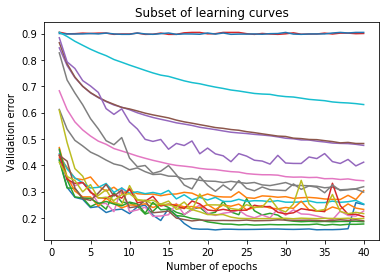

In [8]:
import numpy as np

n_subset=20
t_idx = np.arange(1, n_epochs+1)

[plt.plot(t_idx, lc) for lc in learning_curves[:n_subset]]
plt.title("Subset of learning curves")
plt.xlabel("Number of epochs")
plt.ylabel("Validation error")
plt.show()

## Basic Data Exploration

### Histogram and CDF over the final error rate

265
[ 0.15153689  0.1515819   0.15282866  0.15434343  0.15650082  0.15954709
  0.15959183  0.16055092  0.16080048  0.16156045  0.16244856  0.16430366
  0.16470223  0.16500051  0.16504065  0.16676737  0.16724419  0.16746314
  0.16788982  0.16836734  0.16912972  0.1696      0.17007007  0.17097436
  0.17197581  0.17218749  0.17309483  0.17469136  0.17477876  0.17589213
  0.1771176   0.17717566  0.18051375  0.18429064  0.18561671  0.18614719
  0.18654372  0.1888912   0.18908462  0.18939709  0.19002079  0.19011057
  0.19062407  0.19251503  0.19269777  0.19512195  0.19799197  0.20191532
  0.2025641   0.20337261  0.20503018  0.20661408  0.2067056   0.20721804
  0.20923359  0.20958447  0.21048843  0.21072796  0.21152115  0.21208654
  0.21271271  0.21322007  0.21383838  0.21459538  0.2149739   0.21512623
  0.21656115  0.2168614   0.2173462   0.21915322  0.22029654  0.22293893
  0.22635376  0.22674772  0.22709083  0.23027569  0.23098019  0.23246412
  0.23264447  0.23268473  0.23302277  0.2333535

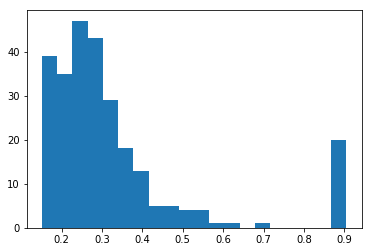

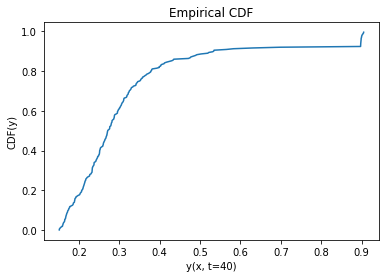

In [15]:
sorted = np.sort(learning_curves[:, -1])   # sorted list of final val error
print(len(sorted))
h = plt.hist(sorted, bins=20)
plt.show()

yvals = np.arange(len(sorted))/float(len(sorted))   # from 0 to 1 in 265 even steps
plt.plot(sorted, yvals)
plt.title("Empirical CDF")
plt.xlabel("y(x, t=40)")
plt.ylabel("CDF(y)")
plt.show()

### Histogram and CDF over all error rates

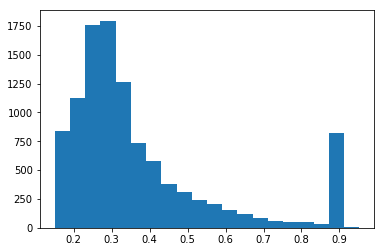

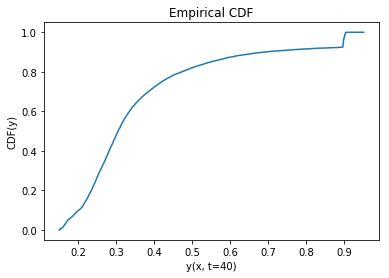

In [14]:
all_values = np.sort(learning_curves.flatten())

h = plt.hist(all_values, bins=20)
plt.show()

yvals = np.arange(all_values.shape[0])/all_values.shape[0]
plt.plot(all_values, yvals)
plt.title("Empirical CDF")
plt.xlabel("y(x, t=40)")
plt.ylabel("CDF(y)")
plt.show()